<div style="
    border: 2px solid #0056A1;
    border-radius: 10px;
    padding: 10px 20px;
    max-width: 100%;
    margin: auto;
    color: #ddd;
    font-family: Arial, sans-serif;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);
    transition: transform 0.3s ease;
    ">
    
<h1 style="
    color: #0056A1;
    text-align: center;
    font-size: 2.5em;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;
    transition: color 0.3s ease;
    ">
    <span onmouseover="this.style.color='#FFA500'" onmouseout="this.style.color='#0056A1'">Patria & Co.</span>
</h1>

<h2 style="
    color: #0056A1;
    text-align: center;
    font-size: 2em;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;
    font-weight: bold;
    transition: color 0.3s ease;
    ">
    <span onmouseover="this.style.color='#FFA500'" onmouseout="this.style.color='#0056A1'">Predictive Maintenance</span>
</h2>

<h4 style="
    text-align: center;
    font-size: 1.2em;
    color: #bbb;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#bbb'">Client: Cliste Rekayasa Indonesia</span>
</h4>

<h4 style="
    text-align: center;
    font-size: 1.2em;
    color: #bbb;
    margin: 5px 0;
    font-family: 'Arial', sans-serif;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#bbb'">Dr. Harry Patria</span>
</h4>

<p style="
    text-align: center;
    font-size: 1.1em;
    color: #aaa;
    font-style: italic;
    margin: 5px 0;">
    <span onmouseover="this.style.color='#66ccff'" onmouseout="this.style.color='#aaa'">December 2024</span>
</p>

<hr style="
    border-top: 1px solid #0056A1;
    margin: 10px 0;">
</div>


![](https://j.gifs.com/76kDrQ.gif)

### Predictive Maintenance Classification: Dataset Overview and Applications
#### Introduction
Predictive maintenance is a critical domain within industrial applications, focusing on predicting equipment failures to optimize maintenance schedules and minimize downtime. This dataset serves as a representation of real-world predictive maintenance challenges, providing key measurements from industrial equipment. By leveraging advanced machine learning techniques, this dataset enables the development of models for both binary classification (failure detection) and multiclass classification (failure type identification).

Below, we provide a systematic breakdown of the dataset's structure, features, and potential use cases.

<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.6;"> <table style="border-collapse: collapse; width: 100%; font-size: 14px; margin-top: 20px;"> <thead> <tr style="background-color: #0073e6; color: #fff; text-align: left; border: 1px solid #ddd;"> <th style="padding: 10px;">Feature</th> <th style="padding: 10px;">Description</th> <th style="padding: 10px;">Type</th> </tr> </thead> <tbody> <tr style="border: 1px solid #ddd;"> <td style="padding: 10px;"><strong>Type</strong></td> <td style="padding: 10px;">The quality of the product categorized into <code>L</code> (Low), <code>M</code> (Medium), and <code>H</code> (High).</td> <td style="padding: 10px;">Categorical</td> </tr> <tr style="border: 1px solid #ddd; background-color: #f9f9f9;"> <td style="padding: 10px;"><strong>Air Temperature [K]</strong></td> <td style="padding: 10px;">Generated using a random walk process, normalized to a standard deviation of 2 K around 300 K.</td> <td style="padding: 10px;">Continuous</td> </tr> <tr style="border: 1px solid #ddd;"> <td style="padding: 10px;"><strong>Process Temperature [K]</strong></td> <td style="padding: 10px;">Derived from air temperature with an additional 10 K, normalized to a standard deviation of 1 K.</td> <td style="padding: 10px;">Continuous</td> </tr> <tr style="border: 1px solid #ddd; background-color: #f9f9f9;"> <td style="padding: 10px;"><strong>Rotational Speed [rpm]</strong></td> <td style="padding: 10px;">Calculated from power output with added Gaussian noise.</td> <td style="padding: 10px;">Continuous</td> </tr> <tr style="border: 1px solid #ddd;"> <td style="padding: 10px;"><strong>Torque [Nm]</strong></td> <td style="padding: 10px;">Torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm.</td> <td style="padding: 10px;">Continuous</td> </tr> <tr style="border: 1px solid #ddd; background-color: #f9f9f9;"> <td style="padding: 10px;"><strong>Tool Wear [min]</strong></td> <td style="padding: 10px;">Tool wear increases based on product quality (H/M/L adding 5/3/2 minutes respectively).</td> <td style="padding: 10px;">Continuous</td> </tr> <tr style="border: 1px solid #ddd;"> <td style="padding: 10px;"><strong>UID</strong></td> <td style="padding: 10px;">Unique identifier ranging from 1 to 10,000.</td> <td style="padding: 10px;">Not Useful</td> </tr> <tr style="border: 1px solid #ddd; background-color: #f9f9f9;"> <td style="padding: 10px;"><strong>ProductID</strong></td> <td style="padding: 10px;">Unique identifier for the product.</td> <td style="padding: 10px;">Not Useful</td> </tr> </tbody> </table> </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier, EasyEnsembleClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve
import pickle
sns.set()

In [2]:
# Load the data
df = pd.read_csv('predictive_maintenance.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

Quick insights:

- 10.000 instances in the dataset
- No missing values 
- Binary Target variable are ones and zeros
UDI seems to be an index number. Product ID is an identification number. Hence, it can be removed

In [3]:
# Checking unique values for 'UDI' and 'Product ID'
print(f"{df['UDI'].nunique()} unique values for 'UDI'")
print(f"{df['Product ID'].nunique()} unique value for 'Pruduct ID'")

# Dropping 'UDI' and 'Product ID' from the dataset
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

10000 unique values for 'UDI'
10000 unique value for 'Pruduct ID'


In [4]:
# Let's change the name of the columns.
df = df.rename(mapper={'Air temperature [K]': 'Air temperature',
                       'Process temperature [K]': 'Process temperature',
                       'Rotational speed [rpm]': 'Rotational speed',
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]': 'Tool wear'}, axis=1)

Failure Type Distribution:

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Failure Type Distribution Summary:
               Failure Type  Count  Percentage (%)
0                No Failure   9652           96.52
1  Heat Dissipation Failure    112            1.12
2             Power Failure     95            0.95
3        Overstrain Failure     78            0.78
4         Tool Wear Failure     45            0.45
5           Random Failures     18            0.18


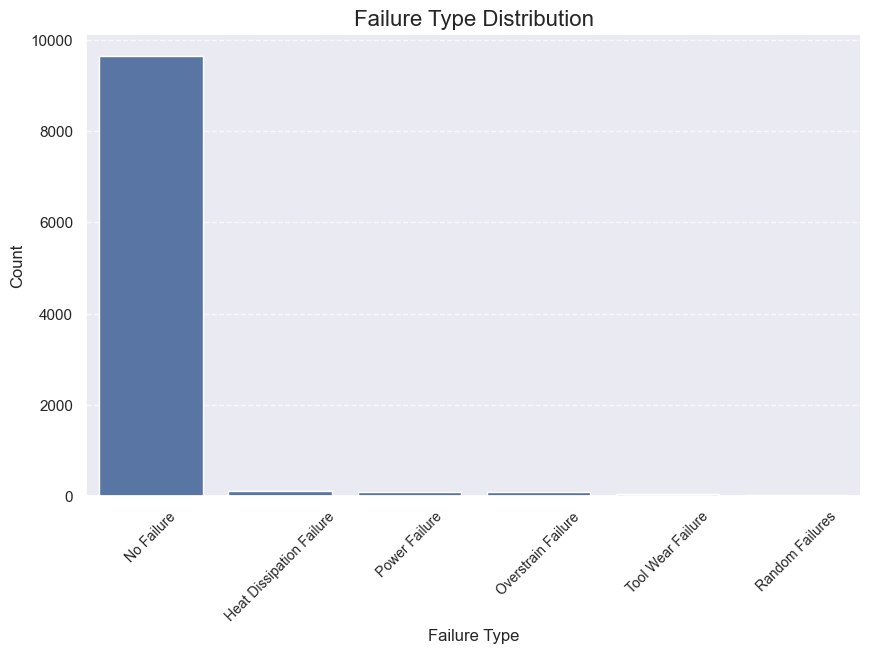

In [5]:
# Taking a look at the 'Failure Type' variable
failure_type_counts = df['Failure Type'].value_counts()

# Display the counts in a formatted table
print("Failure Type Distribution:\n")
print(failure_type_counts)

# Convert counts to percentages for better understanding
failure_type_percentages = (failure_type_counts / len(df)) * 100

# Display counts and percentages together
failure_type_summary = pd.DataFrame({
    "Count": failure_type_counts,
    "Percentage (%)": failure_type_percentages
})

# Format the DataFrame for better display
failure_type_summary.index.name = "Failure Type"
failure_type_summary = failure_type_summary.reset_index()
failure_type_summary["Percentage (%)"] = failure_type_summary["Percentage (%)"].round(2)

# Print summary table
print("\nFailure Type Distribution Summary:")
print(failure_type_summary)

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=failure_type_summary, 
    x="Failure Type", 
    y="Count"
)
plt.title("Failure Type Distribution", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Failure Type", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


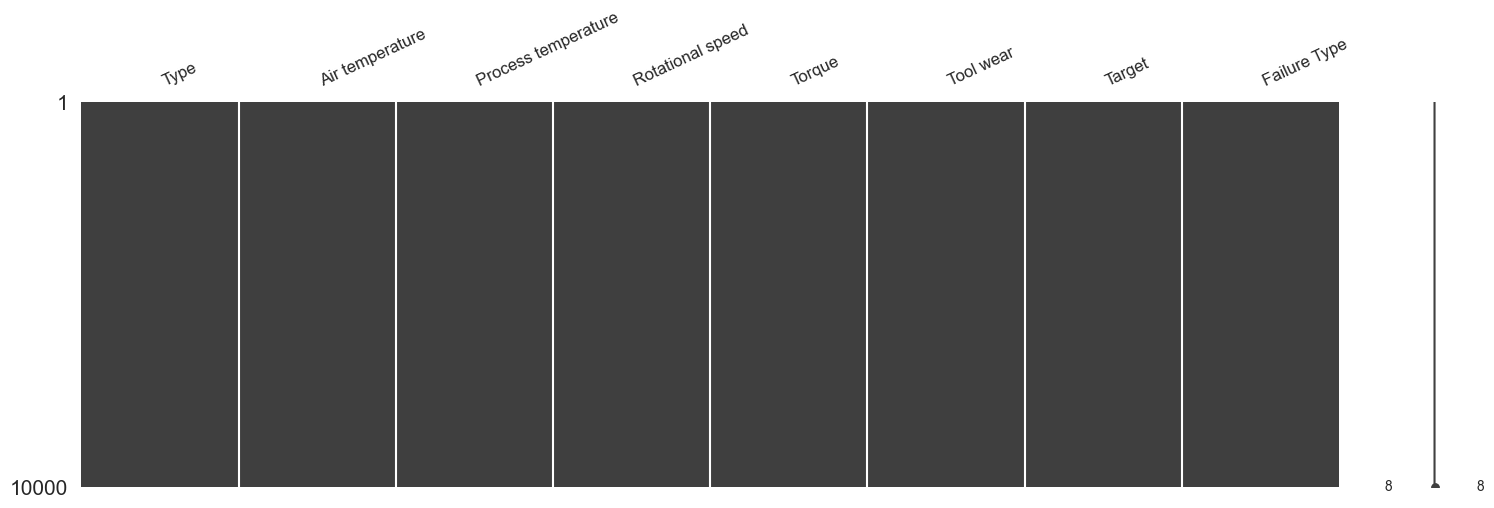

In [6]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12);
plt.xticks(rotation=25);

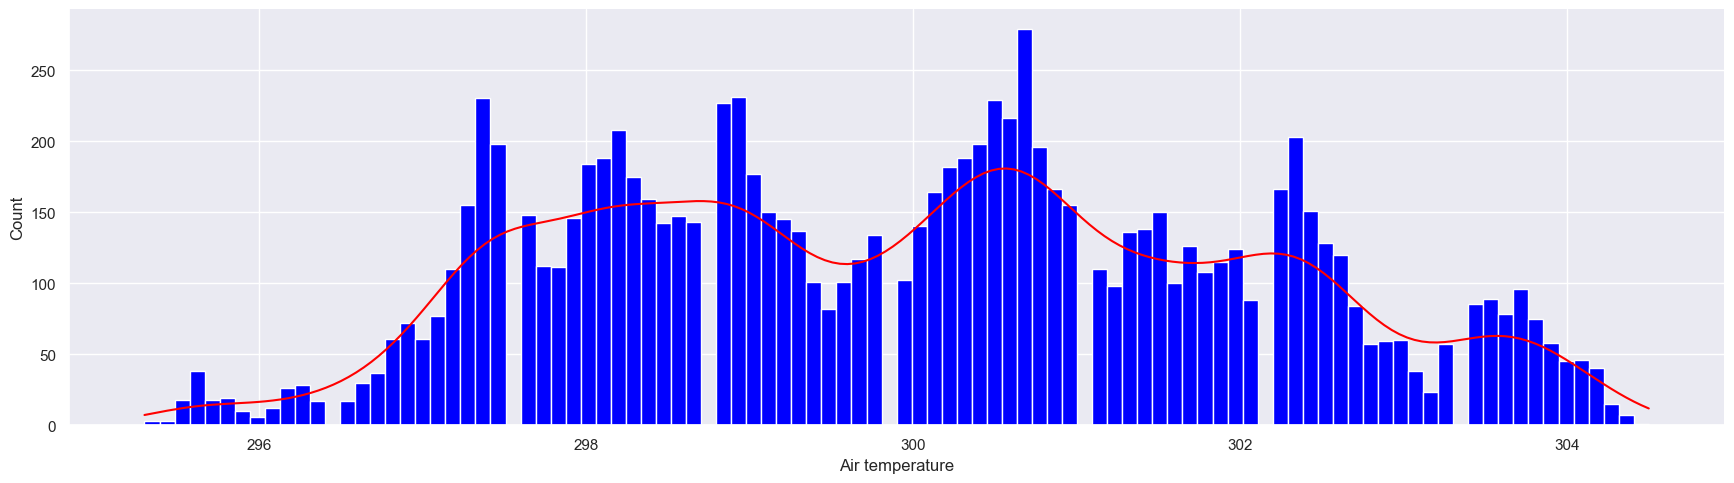

In [7]:
sns.displot(data=df, x="Air temperature", kde=True, bins = 100,color = "red", facecolor = "blue",height = 5, aspect = 3.5);

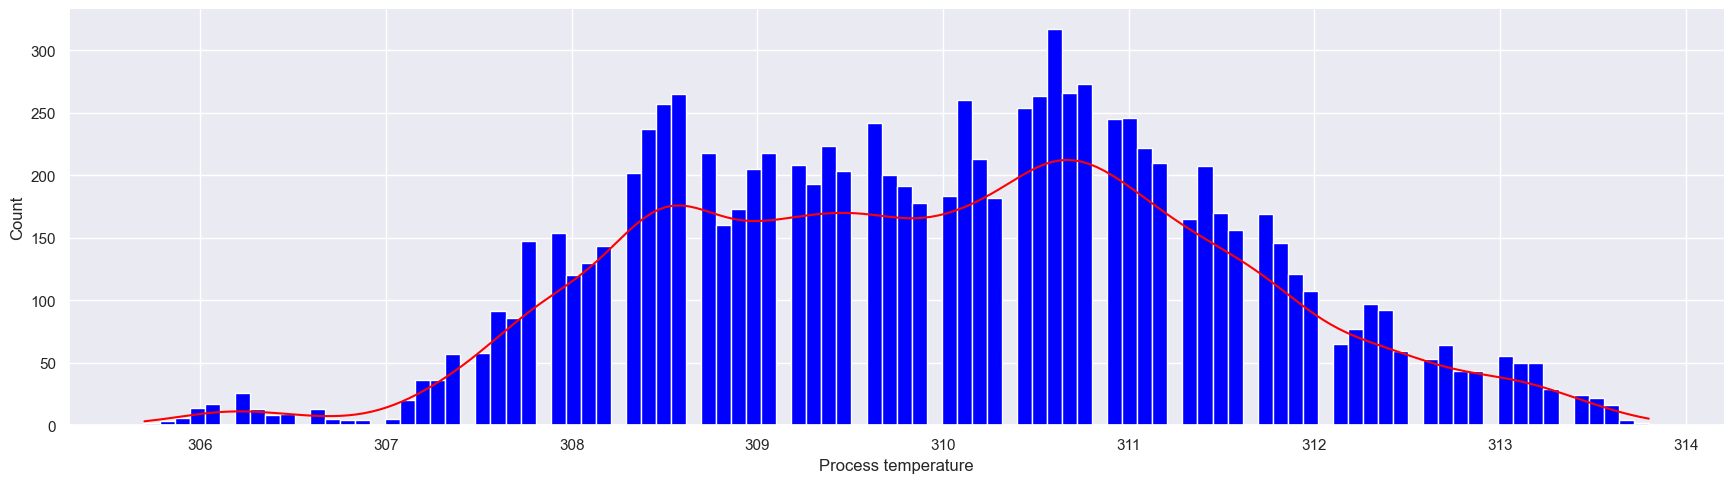

In [8]:
sns.displot(data=df, x="Process temperature", kde=True, bins = 100,color = "red", facecolor = "blue",height = 5, aspect = 3.5);

In [9]:
# Taking a look at the data types
df.dtypes

Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed         int64
Torque                 float64
Tool wear                int64
Target                   int64
Failure Type            object
dtype: object

In [10]:
# Checking types of failure
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

There are 5 types of failure + not failure.

Now, let's check if there are inconsistencies between 'Target' and 'Failure Type':

In [11]:
df_failure = df[df['Target'] == 1]
df_failure['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

WARNING!! 9 values are classified as failure in the 'Target' variable but as No Failure in the 'Failure Type' variable. Let's check in the dataset:

In [12]:
df_failure[df_failure['Failure Type'] == 'No Failure']

Type  Air temperature  Process temperature  Rotational speed  Torque  \
1437    H            298.8                309.9              1439    45.2   
2749    M            299.7                309.2              1685    28.9   
4044    M            301.9                310.9              1419    47.7   
4684    M            303.6                311.8              1421    44.8   
5536    M            302.3                311.8              1363    54.0   
5941    L            300.6                310.7              1438    48.5   
6478    L            300.5                309.8              1663    29.1   
8506    L            298.4                309.6              1710    27.3   
9015    L            297.2                308.1              1431    49.7   

      Tool wear  Target Failure Type  
1437         40       1   No Failure  
2749        179       1   No Failure  
4044         20       1   No Failure  
4684        101       1   No Failure  
5536        119       1   No Failure  
5941         78       1   No Failure  
6478        145       1   No Failure  
8506        163       1   No Failure  
9015        210       1   No Failure

It could go both ways, either failure or no failure. I think it would make sense to remove those instances since we do not know the real target here.

In [13]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'No Failure'].index
df.drop(index_possible_failure, axis=0, inplace=True)

In [14]:
df_failure = df[df['Target'] == 0]
df_failure['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

Second warning!! Similarly, we have 18 instances classifed as Random Failures by 'Failure Type', whereas they are classifed as No failure by the 'Target Variable'. These 18 instances are in fact all instaces of 'Random Failures'. Again, let's check and remove those instances as we do not really know if they belong to Failure class or not. Hence, we will end up with 4 types of failures since 'Random Failures' will be removed altogether.

In [15]:
df_failure[df_failure['Failure Type'] == 'Random Failures']

Type  Air temperature  Process temperature  Rotational speed  Torque  \
1221    M            297.0                308.3              1399    46.4   
1302    L            298.6                309.8              1505    45.7   
1748    H            298.4                307.7              1626    31.1   
2072    L            299.6                309.5              1570    35.5   
2559    L            299.3                309.0              1447    50.4   
3065    M            300.1                309.2              1687    27.7   
3452    H            301.6                310.5              1602    32.3   
5471    L            302.7                312.3              1346    61.2   
5489    L            302.6                312.1              1499    35.0   
5495    H            302.9                312.5              1357    55.0   
5509    L            302.8                312.2              1509    36.5   
5553    L            302.5                311.9              1306    59.7   
5639    L            302.6                312.1              1668    28.7   
6091    L            300.9                310.7              1412    57.5   
6913    L            300.8                311.2              1481    38.5   
6960    L            300.7                311.0              1413    52.0   
7488    L            300.3                311.7              1545    43.5   
7868    H            300.4                311.9              1438    46.7   

      Tool wear  Target     Failure Type  
1221        132       0  Random Failures  
1302        144       0  Random Failures  
1748        166       0  Random Failures  
2072        189       0  Random Failures  
2559        140       0  Random Failures  
3065         95       0  Random Failures  
3452          2       0  Random Failures  
5471        170       0  Random Failures  
5489        215       0  Random Failures  
5495         12       0  Random Failures  
5509         52       0  Random Failures  
5553        172       0  Random Failures  
5639        180       0  Random Failures  
6091         16       0  Random Failures  
6913        181       0  Random Failures  
6960         91       0  Random Failures  
7488        160       0  Random Failures  
7868         41       0  Random Failures

In [16]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'Random Failures'].index
df.drop(index_possible_failure, axis=0, inplace=True)

27 instaces were removed (0.27% of the entire dataset). Of which:

9 belonged to class Failure in 'Target' variable and No failure in target 'Failure Type'
18 belonged to class No failure in 'Target' variable and Random failures in target 'Failure Type'

In [17]:
# We can check that all 27 instances were removed from the dataset:
df.shape[0]

9973

In [18]:
# Let's reset the index
df.reset_index(inplace=True, drop=True)

#### Explanatory Data Analysis (EDA)

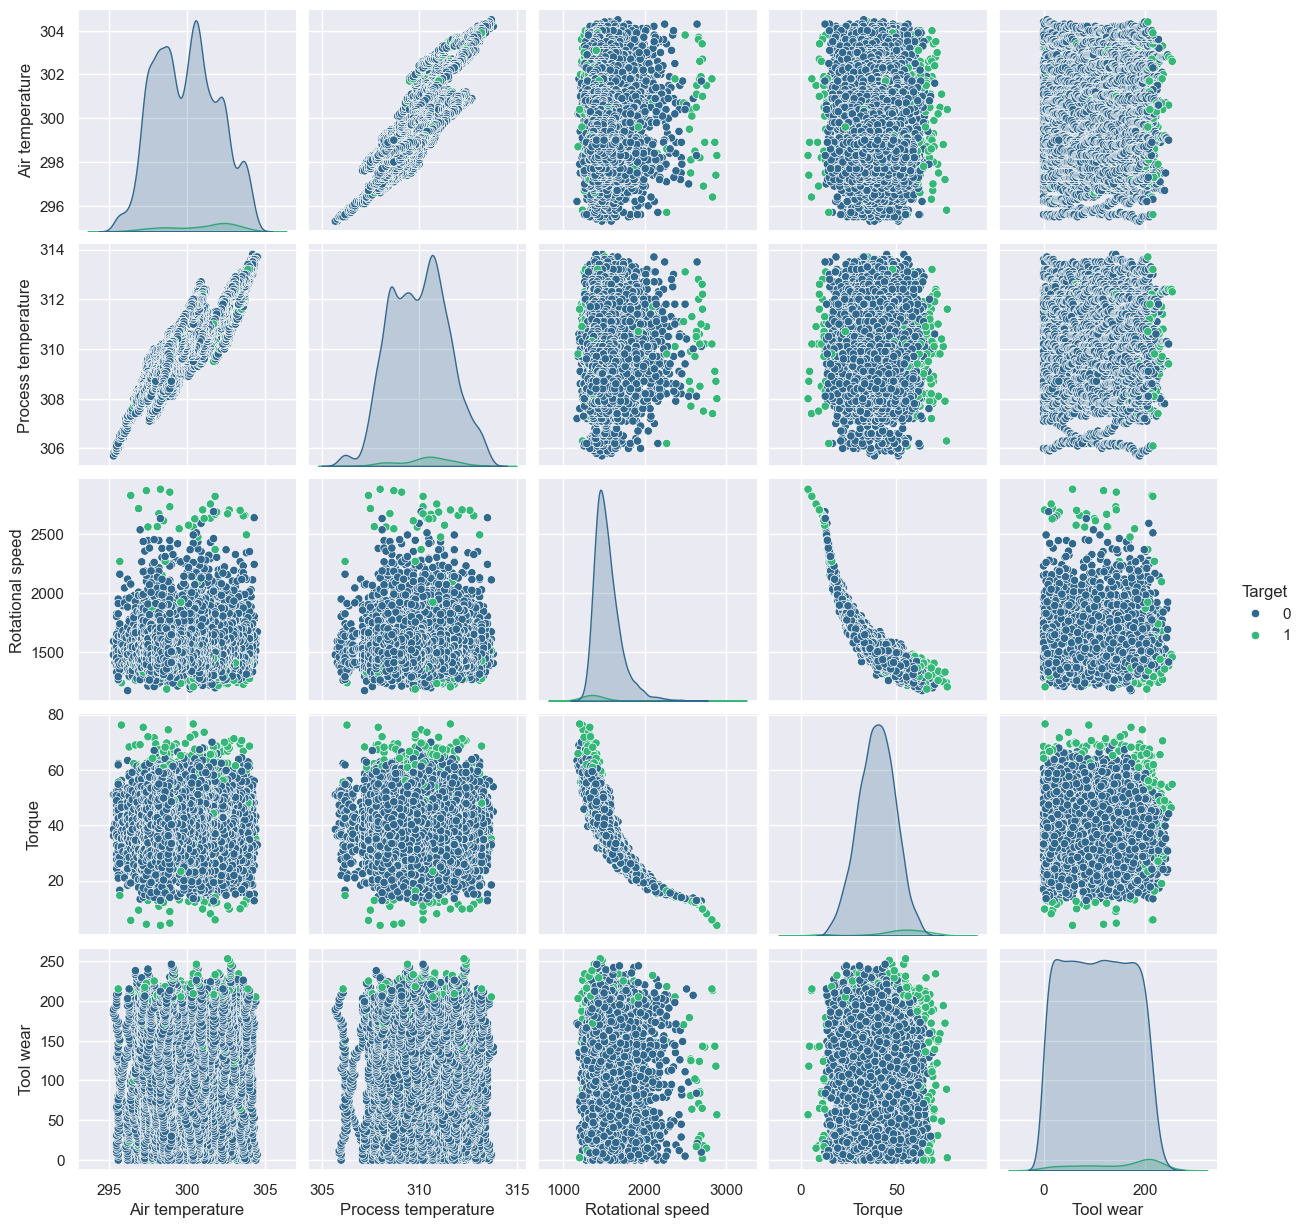

In [19]:
sns.pairplot(df, hue='Target', palette='viridis')

Insights:

- Torque and rotational speed are highly correlated.
- Process temperature and air temperature are also highly correlated.
- We immediately see that failures occur for extreme values of some features, i.e., the machinery fails either for the lowest or largest values of torque and rotational speed. This is easily spotted in the graph since the green dots are far apart for those features. So, there is a range for normal conditions in which the machines operate, and above or under this range, they tend to fail.

Let's plot a violin chart to see how torque and rotational speed behave:

C:\Users\harry\AppData\Local\Temp\ipykernel_32604\4015366238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Target', y=i, ax=axes[j], palette='husl')
C:\Users\harry\AppData\Local\Temp\ipykernel_32604\4015366238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Target', y=i, ax=axes[j], palette='husl')


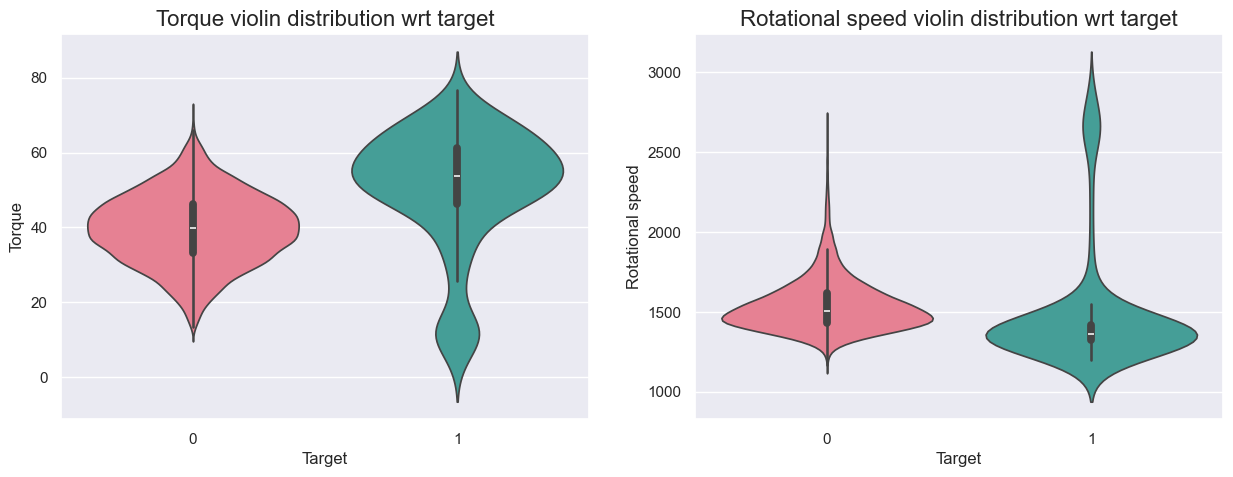

In [20]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16

fig, axes = plt.subplots(1, 2, figsize=[15,5])
axes = axes.flatten()
j=0

for i in ['Torque', 'Rotational speed']:
    sns.violinplot(data=df, x='Target', y=i, ax=axes[j], palette='husl')
    axes[j].set_title(i + ' violin distribution wrt target', )
    j += 1

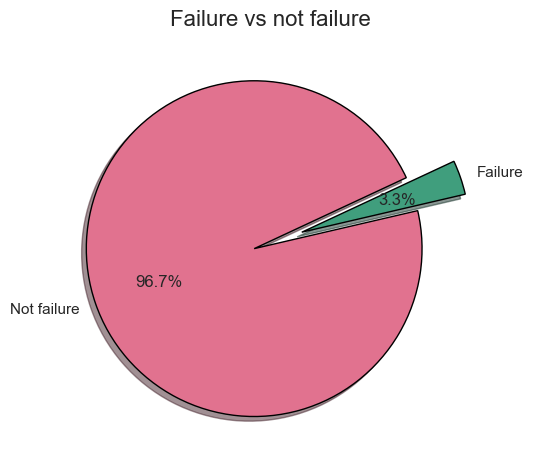

In [21]:
colors = ['#E1728F', '#409E7D'] 
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        colors=colors)
plt.title('Failure vs not failure')
plt.tight_layout()
plt.show()

#### Correllation Heatmap

In [22]:
df.head()

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   
2    L            298.1                308.5              1498    49.4   
3    L            298.2                308.6              1433    39.5   
4    L            298.2                308.7              1408    40.0   

   Tool wear  Target Failure Type  
0          0       0   No Failure  
1          3       0   No Failure  
2          5       0   No Failure  
3          7       0   No Failure  
4          9       0   No Failure

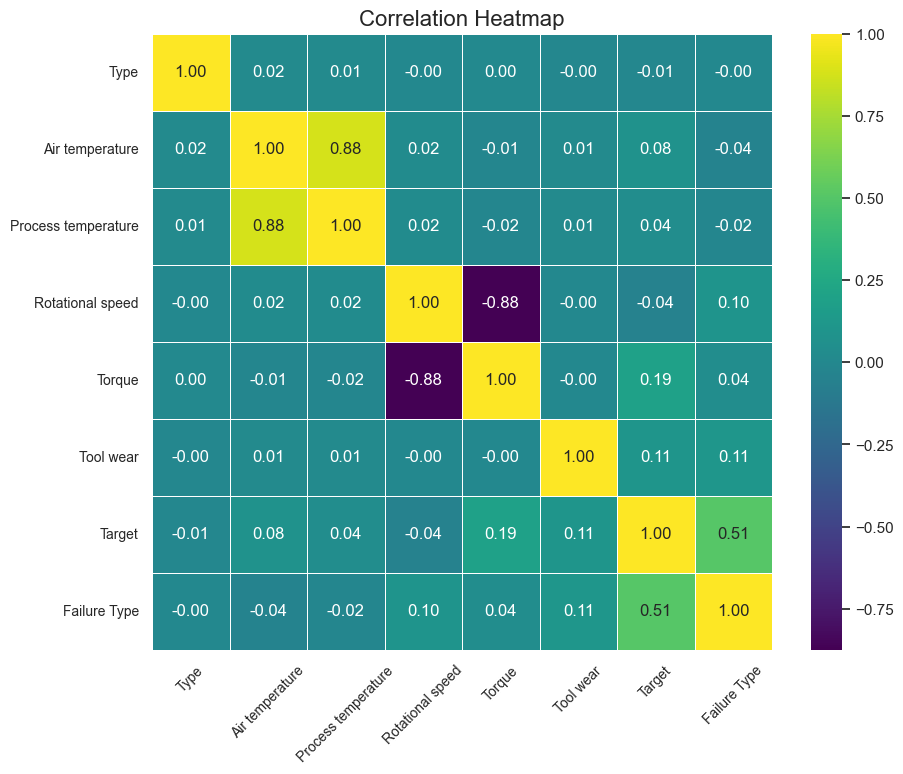

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset to avoid modifying the original
df_encoded = df.copy()

# Encode 'Type'
type_encoder = LabelEncoder()
df_encoded['Type'] = type_encoder.fit_transform(df_encoded['Type'])

# Encode 'Failure Type'
failure_type_encoder = LabelEncoder()
df_encoded['Failure Type'] = failure_type_encoder.fit_transform(df_encoded['Failure Type'])

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

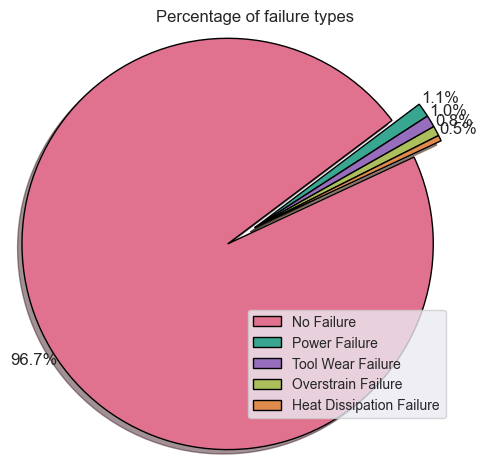

In [24]:
columns_failure_type = df['Failure Type'].unique().tolist()  # Types of failures

plt.rcParams["figure.figsize"] = (5,5)
colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

plt.pie(df['Failure Type'].value_counts(), explode=(0.2, 0, 0, 0, 0), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        pctdistance=1.1, radius=1.3, colors=colors)
plt.legend(columns_failure_type, loc='lower right', fontsize=10)

plt.title('Percentage of failure types', fontsize=12)
plt.tight_layout()

#### Exploring features for each type of failure

Text(0.5, 1.0, 'Excluding class no failure')

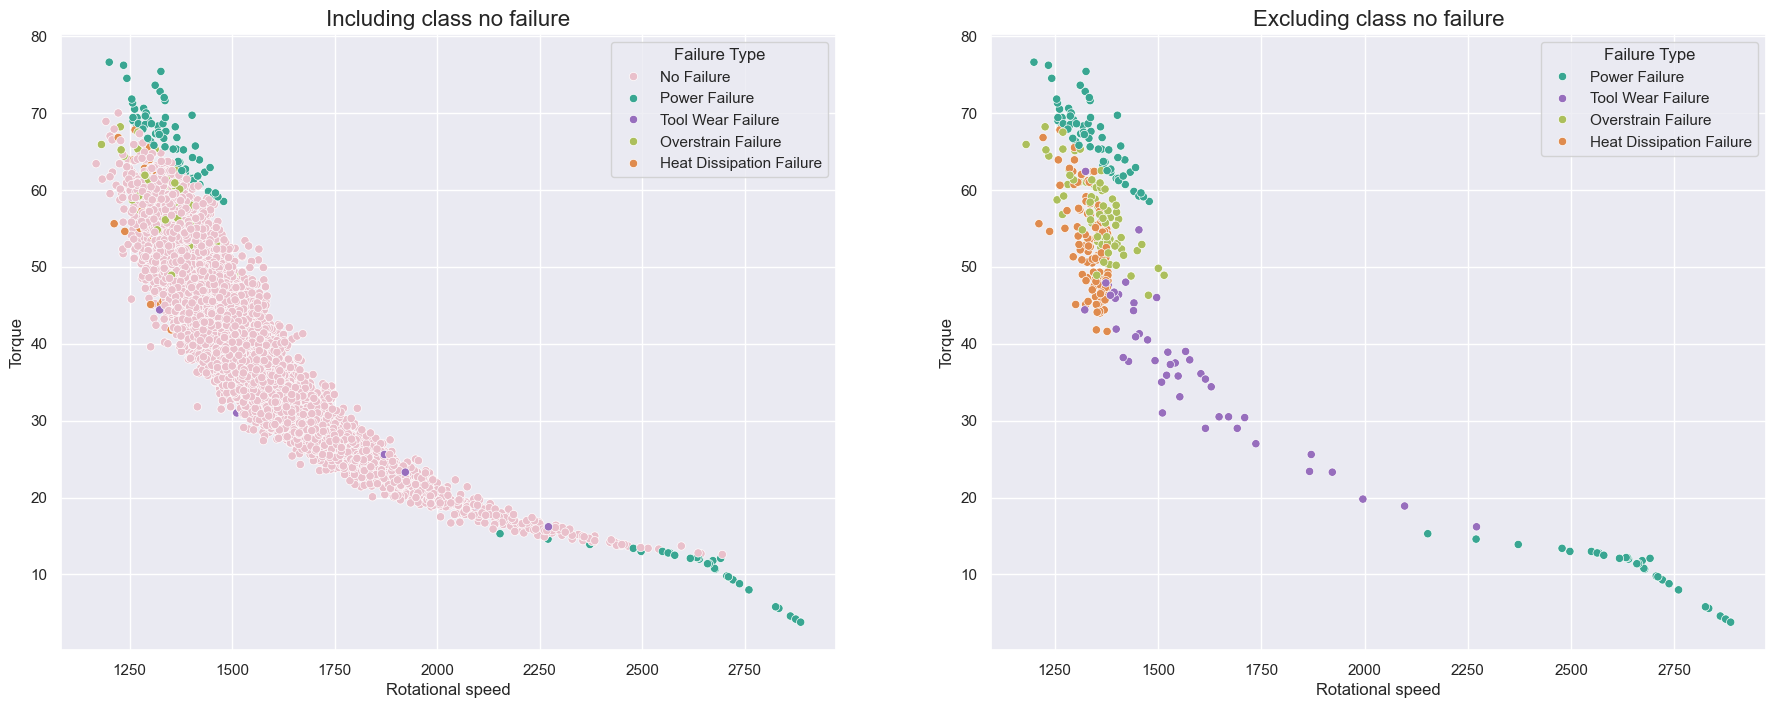

In [25]:
fig, ax = plt.subplots(1,2, figsize=[22,8])
plt.title('Rot. Speed vs Torque wrt Failure Type')
sns.scatterplot(data=df, x='Rotational speed', y='Torque', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[0])
sns.scatterplot(data=df[df['Target'] == 1], x='Rotational speed', y='Torque', hue='Failure Type', palette=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[1])

ax[0].set_title('Including class no failure')
ax[1].set_title('Excluding class no failure')

Some insights:

- Power failure happens both for lower and higher rotational speed/torque. It is the type of failure with the highest rotational speed (over 2500rpm) and lowest torque (below around 15Nm). In other others, above and below these thresholds only power failures occur.
- Between torques 16Nm and 41Nm all failures are tool wear.
- Overstrain failures take place with torques ranging from around 47 and 68Nm) and rotational speeds from 1200 to 1500rpm approximately.
- For heat dissipation failures, the torque range is smaller and the rotational speed range is bigger compared to overstrain failures.

#### Distribution

----- SKEWNESS ------------


C:\Users\harry\AppData\Local\Temp\ipykernel_32604\1531974068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])


Air temperature skewness = 0.12


C:\Users\harry\AppData\Local\Temp\ipykernel_32604\1531974068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])


Process temperature skewness = 0.02


C:\Users\harry\AppData\Local\Temp\ipykernel_32604\1531974068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])


Rotational speed skewness = 1.99


C:\Users\harry\AppData\Local\Temp\ipykernel_32604\1531974068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])


Torque skewness = -0.01


C:\Users\harry\AppData\Local\Temp\ipykernel_32604\1531974068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])


Tool wear skewness = 0.03
---------------------------


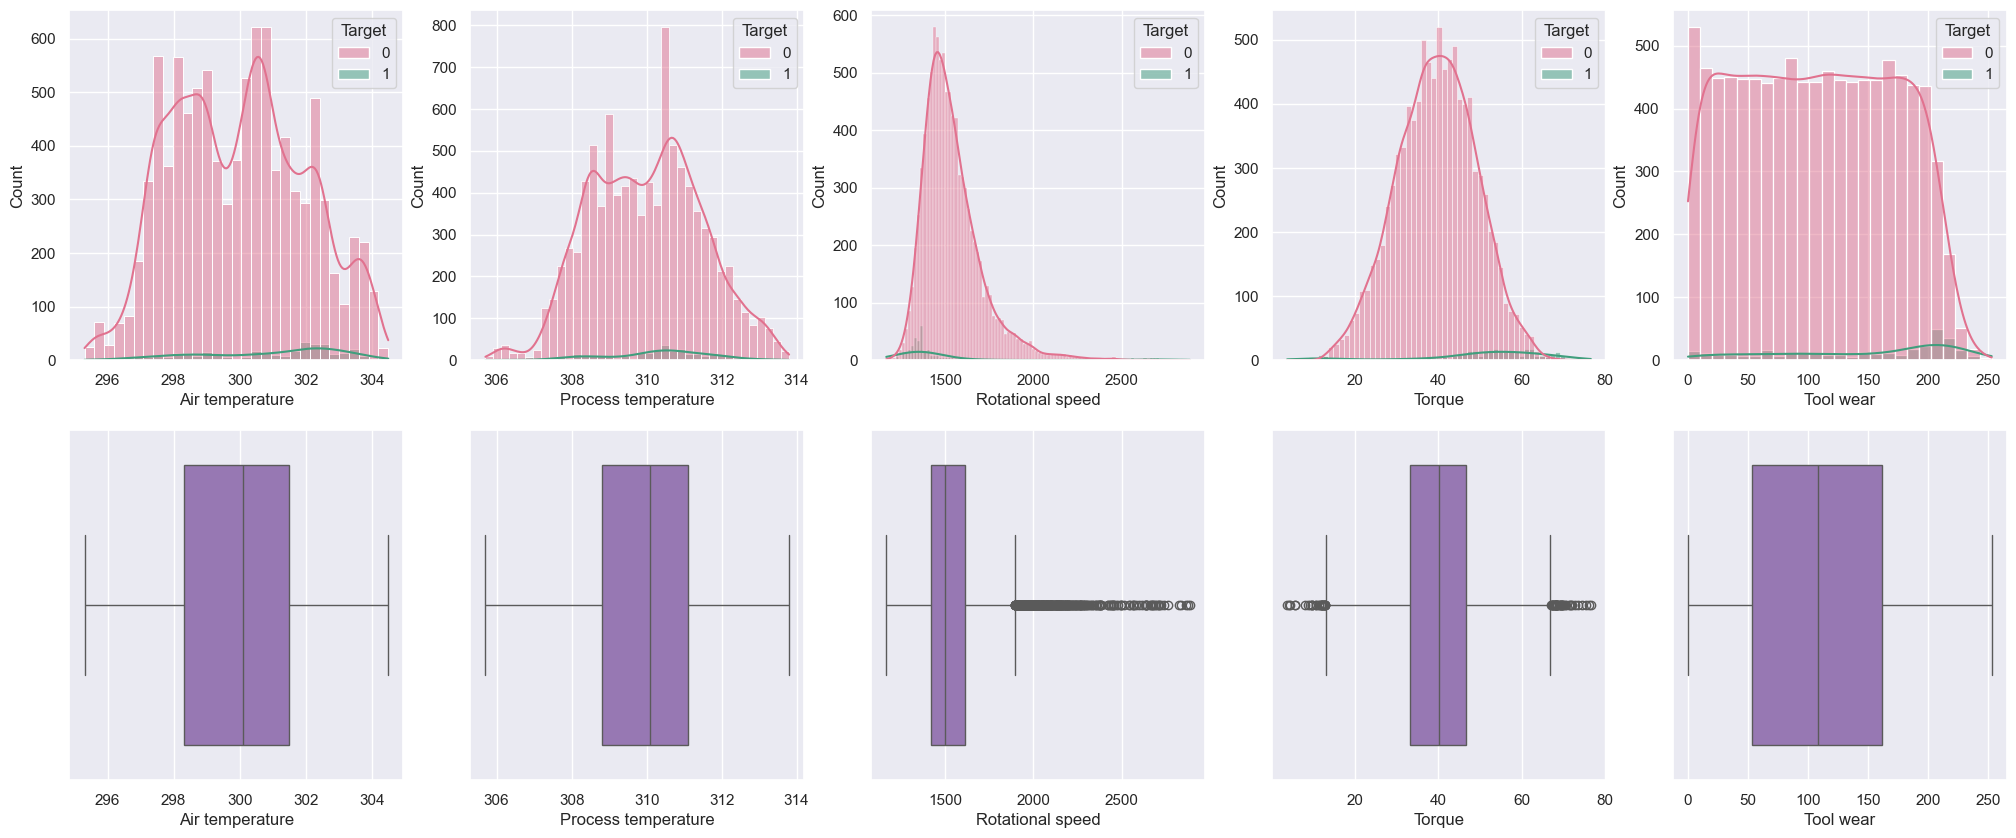

In [26]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 5, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']:
    sns.histplot(data=df, x=i, kde=True, ax=axes[0,j], hue='Target', palette=colors)
    sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(df[i].skew(), 2)))
print('---------------------------')

- Rotational speed is positively skewed.
- From the boxplots we can see that 'Rotational speed' and 'Torque' have outliers.

Let's check those potential 'outliers' by analyzing the boxplots:

In [27]:
# Function to calculate the maximum and minumum value from the boxplot
def maximum_box(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    return maximum, minimum

for i in ['L', 'M', 'H']:
    df_product_type = df[df['Type'] == i]
    max_rotational_speed, min_rotational_speed = maximum_box(df_product_type['Rotational speed'])
    max_torque, min_torque = maximum_box(df_product_type['Torque'])
    print('Values from boxplot for type product ' + i + ':')
    print(f'Maximum torque value: {round(max_torque,2)}')
    print(f'Minimum torque value: {round(min_torque,2)}')
    print(f'Maximum rotational speed value: {round(max_rotational_speed,2)}')
    print(f'Minimum rotational speed value: {round(min_rotational_speed,2)}')
    print('='*20)

Values from boxplot for type product L:
Maximum torque value: 67.2
Minimum torque value: 12.8
Maximum rotational speed value: 1894.0
Minimum rotational speed value: 1142.0
Values from boxplot for type product M:
Maximum torque value: 67.05
Minimum torque value: 13.05
Maximum rotational speed value: 1895.75
Minimum rotational speed value: 1137.75
Values from boxplot for type product H:
Maximum torque value: 66.96
Minimum torque value: 12.66
Maximum rotational speed value: 1894.38
Minimum rotational speed value: 1143.38


Insight: The operational range for torque and rotational speed are similar for all product types.

Values above the maximum and below the minimum might be outliers, but not necessarily.

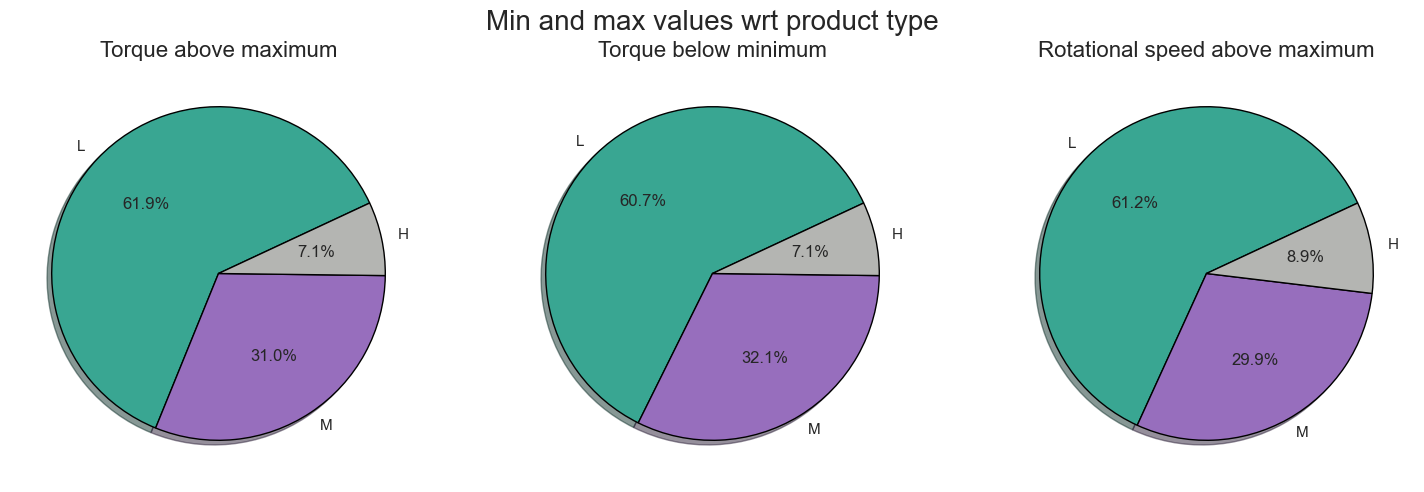

In [28]:
max_rotational_speed, min_rotational_speed = maximum_box(df['Rotational speed'])
max_torque, min_torque = maximum_box(df['Torque'])

max_torque_values = df[df['Torque'] >= max_torque]['Type'].value_counts()  # Torque values above the boxplot maximum
min_torque_values = df[df['Torque'] <= min_torque]['Type'].value_counts()  # Torque values below the boxplot minimum
max_rotational_speed_values = df[df['Rotational speed'] >= max_rotational_speed]['Type'].value_counts()  # Rotational spede values above the boxplot maximum

fig, axes = plt.subplots(1,3, figsize=[15,5])
fig.suptitle('Min and max values wrt product type', fontsize=20)
plt.rcParams['axes.titlesize'] = 16
axes.flatten()
j=0
colors = ['#39A692', '#976EBD', '#B4B5B2']

for i in [max_torque_values, min_torque_values, max_rotational_speed_values]:
    axes[j].pie(i, labels=['L', 'M', 'H'], colors=colors,
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)
    j+=1

axes[0].set_title('Torque above maximum')
axes[1].set_title('Torque below minimum')
axes[2].set_title('Rotational speed above maximum')
plt.tight_layout()

Insight: The values above the maximum and below the minimum are not highly correlated with the product type. The proportion of the pies is similar to the 60-30-10 proportion of the entire dataset.

However, there are proportionally slightly more values for L products and less for H across the three scenarios.

In [29]:
total_max_min_values = max_torque_values.sum() + min_torque_values.sum() + max_rotational_speed_values.sum()  # Total of instance under and above the minimum and maximum threshold from the boxplot, respectively.
ratio = total_max_min_values/df.shape[0]  # Percetange of these values with respect to the entire dataset
print('Percentage of values under and above the minimum and maximum threshold from the boxplot: {}'.format(ratio))

Percentage of values under and above the minimum and maximum threshold from the boxplot: 0.048932116715130855


Insight: 4.87% of the instances could be considered as ouliers using the boxplot method.

### Data Preprocessing

In [30]:
columns_failure_type = df['Failure Type'].unique().tolist()

#### Ordinal Encoding

In [31]:
# Pass on the categorical values
ord_enc = OrdinalEncoder(categories=[['L', 'M', 'H'], columns_failure_type])

# Fit and transform the data for feature 'Type' and target 'Failure Type'
new_dat = ord_enc.fit_transform(df[['Type', 'Failure Type']])
new_dat
df.drop(['Type', 'Failure Type'], axis=1, inplace=True)

new_df = pd.DataFrame(new_dat, 
                      index=df.index, 
                      columns=['Type', 'Failure Type'])

df = pd.concat([df, new_df], axis=1)

#### Scaling data

Since 'Rotational spede' and 'Torque' have some outliers, I am going to use RobustScaler:

In [32]:
df_scaled = df.copy()

# Scaling Rotational speed and torque with robust scaler:
columns = ['Rotational speed', 'Torque']
scaler = RobustScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled,features_scaled], axis=1)

df_scaled.head(5)

Air temperature  Process temperature  Tool wear  Target  Type  \
0            298.1                308.6          0       0   1.0   
1            298.2                308.7          3       0   0.0   
2            298.1                308.5          5       0   0.0   
3            298.2                308.6          7       0   0.0   
4            298.2                308.7          9       0   0.0   

   Failure Type  Rotational speed    Torque  
0           0.0          0.253968  0.200000  
1           0.0         -0.502646  0.459259  
2           0.0         -0.026455  0.688889  
3           0.0         -0.370370 -0.044444  
4           0.0         -0.502646 -0.007407

The rest of the features will be scaled with MinMax scaling:

In [33]:
columns = ['Air temperature', 'Process temperature', 'Tool wear']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df[columns])
features_scaled = pd.DataFrame(features_scaled, columns=columns)
df_scaled.drop(columns, axis=1, inplace=True)
df_scaled = pd.concat([df_scaled, features_scaled], axis=1)

df_scaled.head()

Target  Type  Failure Type  Rotational speed    Torque  Air temperature  \
0       0   1.0           0.0          0.253968  0.200000         0.304348   
1       0   0.0           0.0         -0.502646  0.459259         0.315217   
2       0   0.0           0.0         -0.026455  0.688889         0.304348   
3       0   0.0           0.0         -0.370370 -0.044444         0.315217   
4       0   0.0           0.0         -0.502646 -0.007407         0.315217   

   Process temperature  Tool wear  
0             0.358025   0.000000  
1             0.370370   0.011858  
2             0.345679   0.019763  
3             0.358025   0.027668  
4             0.370370   0.035573

#### Modeling with 'Target' variable

As the dataset is unbalanced, I am going to used macro f1 score and ROC AUC score to assess model performance.

First, let's build a model with 'Target'. Hence, we need to remove the other target 'Failure Type' to avoid data leakage.

#### Stratified Split

In [34]:
X = df_scaled.drop(['Target', 'Failure Type'], axis=1)
y = df_scaled['Target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

print('Checking the stratified split...')
print('Target proportion in original dataset:')
print(df['Target'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
print(y_test.value_counts(normalize=True))

Checking the stratified split...
Target proportion in original dataset:
Target
0    0.966911
1    0.033089
Name: proportion, dtype: float64
Target proportion in y_train dataset:
Target
0    0.966974
1    0.033026
Name: proportion, dtype: float64
Target proportion in y_test dataset:
Target
0    0.96672
1    0.03328
Name: proportion, dtype: float64


The proportions are similar. Therefore, it was correctly splitted.

Fitting BalancedRandomForestClassifier(n_jobs=-1, random_state=42)


c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the futu

Cross val roc auc test data: 0.9783
Cross val macro f1 score test data: 0.6154
Cross val macro precision score test data: 0.6063
Cross val macro recall score test data: 0.8646

Fitting BalancedBaggingClassifier(n_jobs=-1, random_state=42)
Cross val roc auc test data: 0.9733
Cross val macro f1 score test data: 0.674
Cross val macro precision score test data: 0.6324
Cross val macro recall score test data: 0.8621

Fitting RUSBoostClassifier(random_state=42)
Cross val roc auc test data: 0.8757
Cross val macro f1 score test data: 0.5994
Cross val macro precision score test data: 0.6056
Cross val macro recall score test data: 0.712

Fitting EasyEnsembleClassifier(random_state=42)
Cross val roc auc test data: 0.964
Cross val macro f1 score test data: 0.6218
Cross val macro precision score test data: 0.6039
Cross val macro recall score test data: 0.8341



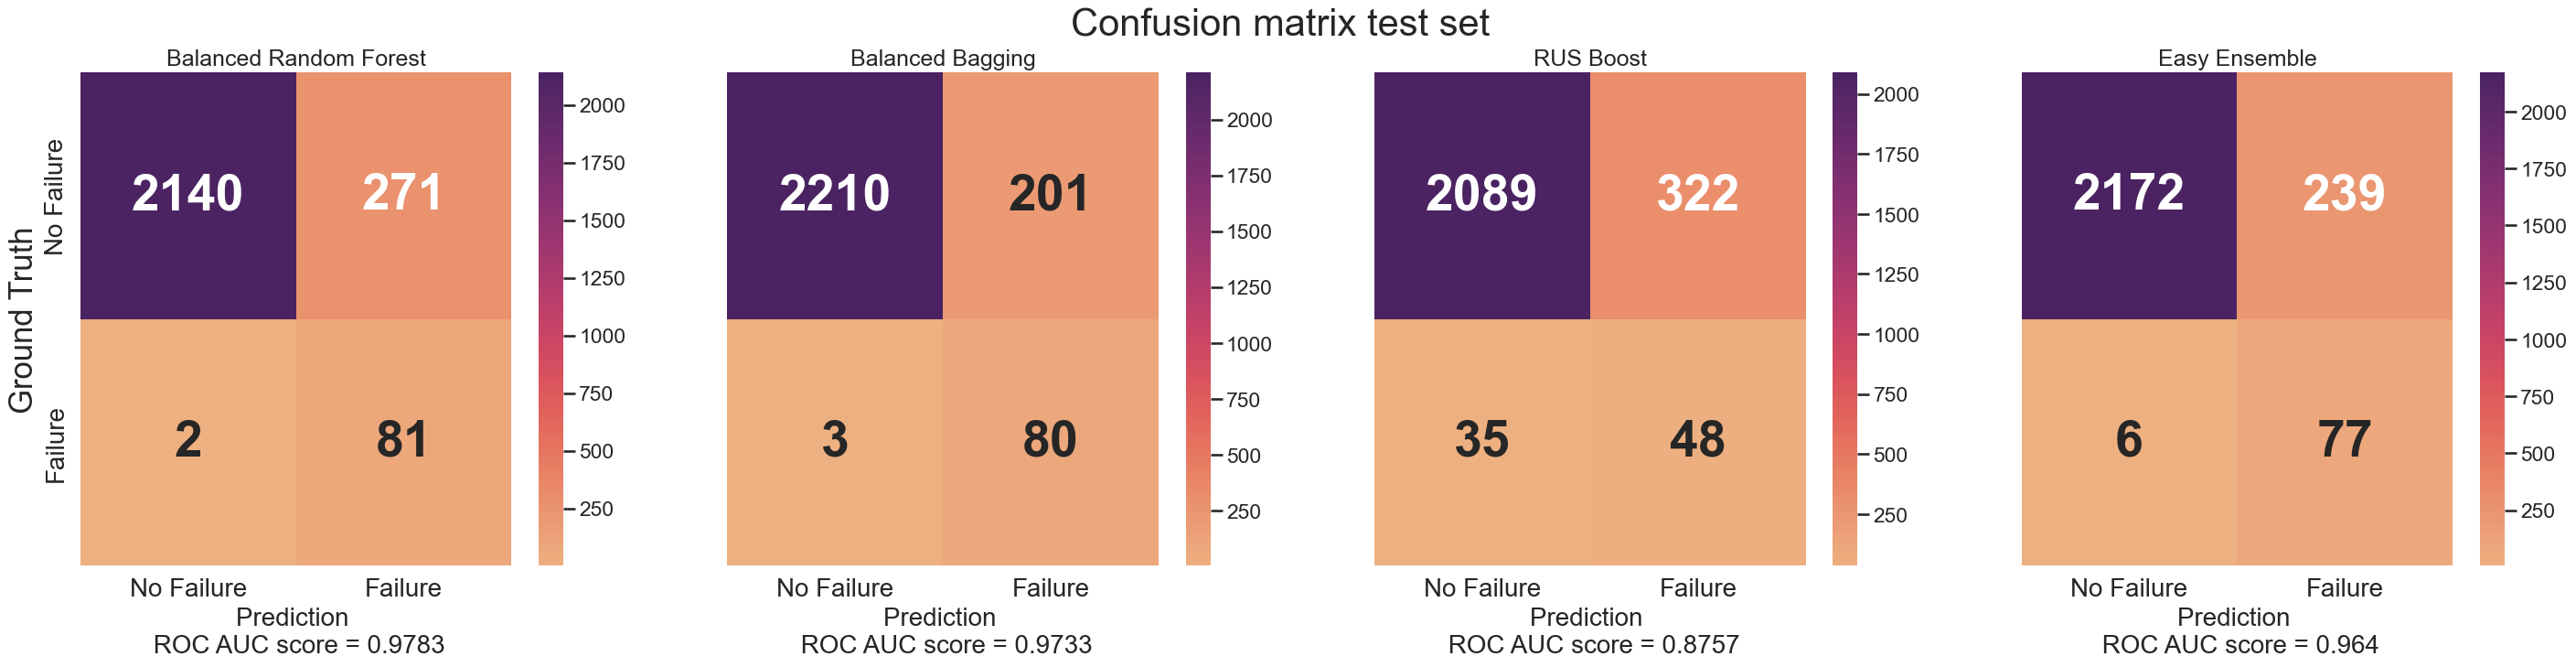

f1  roc_auc
BalancedBaggingClassifier       0.6740   0.9733
EasyEnsembleClassifier          0.6218   0.9640
BalancedRandomForestClassifier  0.6154   0.9783
RUSBoostClassifier              0.5994   0.8757

In [35]:
from sklearn.model_selection import cross_validate

brfc = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1)
RUSB = RUSBoostClassifier(random_state=42)
EEC = EasyEnsembleClassifier(random_state=42)

fig, axes = plt.subplots(1, 4, figsize=[35,7])
fig.suptitle('Confusion matrix test set', fontsize=30)
axes.flatten()
j=0

results_df = pd.DataFrame()

for model in [brfc, bbc, RUSB, EEC]:
    print('Fitting', model)
    model = model.fit(X_train, y_train)

    # Cross validation metrics test data
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    y_pred = model.predict(X_test)
    scoring = ["f1_macro", "precision_macro", "recall_macro"]
    cross_val_scores = cross_validate(model, X, y, scoring=scoring)
    roc_auc_test_cv = round(cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring="roc_auc").mean(),4)
    f1_test_cv = round(cross_val_scores["test_f1_macro"].mean(),4)
    precision_test_cv = round(cross_val_scores["test_precision_macro"].mean(),4)
    recall_test_cv = round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # Summary table
    score_df = pd.DataFrame({
                     'f1': round(cross_val_scores["test_f1_macro"].mean(),4),
                     'roc_auc': roc_auc_test_cv},
                     index=[str(model).split('(')[0]])

    results_df = pd.concat([results_df, score_df])

    # Print metrics
    print(f'Cross val roc auc test data: {roc_auc_test_cv}')
    print(f'Cross val macro f1 score test data: {round(cross_val_scores["test_f1_macro"].mean(),4)}')
    print(f'Cross val macro precision score test data: {round(cross_val_scores["test_precision_macro"].mean(),4)}')
    print(f'Cross val macro recall score test data: {round(cross_val_scores["test_recall_macro"].mean(),4)}')
    print()
    
    # Confusion matrix test data
    sns.set_context('talk')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['No Failure', 'Failure']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction \n ROC AUC score = ' + str(roc_auc_test_cv), fontsize=20)
    j += 1

axes[0].set_yticklabels(labels, fontsize=20)
axes[0].set_ylabel('Ground Truth', fontsize=25)
axes[0].set_title('Balanced Random Forest')
axes[1].set_title('Balanced Bagging')
axes[2].set_title('RUS Boost')
axes[3].set_title('Easy Ensemble')
plt.show()

results_df = results_df.sort_values(by='f1', ascending=False)
results_df.round(4)

All results are using cross validation:

- Balanced Bagging is the best overall model, with highest f1 score and second highest roc auc.
- Balanced Random Forest has a slightly highest roc auc than Balanced Bagging, but its f1 score is lower.
- Easy Ensemble has a high roc auc thant Balance Bagging, but very low f1 score.

#### Over and undersampling with Random Forest and Bagging classifiers (Random Search)

Now, let's try using different sampling techniques with random forest and balanced bagging to see if we achieve better performance than the balanced models:

In [36]:
RdFo = RandomForestClassifier(random_state=42, criterion='entropy')
bbc = BaggingClassifier(random_state=42, n_jobs=-1)

OverSamp_1 = RandomOverSampler(random_state=42)
OverSamp_2 = SMOTE(random_state=42, n_jobs=-1)
OverSamp_3 = BorderlineSMOTE(random_state=42, n_jobs=-1)
OverSamp_4 = ClusterCentroids(random_state=42)
OverSamp_5 = TomekLinks(n_jobs=-1)
OverSamp_6 = NearMiss(version=3, n_jobs=-1)

results_df = pd.DataFrame()

OverSamp_list = [OverSamp_1, OverSamp_2, OverSamp_3, OverSamp_4, OverSamp_5, OverSamp_6]

for model in [RdFo, bbc]:
    if model == RdFo:
        grid_param = {'n_estimators': np.arange(10, 160,10),
                       'max_depth': np.arange(10, 110, 10),
                       'min_samples_split': [2, 5, 10]}
        
    else:
        grid_param = {'n_estimators': np.arange(10, 160,10)}
                      
    for samp in OverSamp_list:
        X_train_resampled, y_train_resampled = samp.fit_resample(X_train, y_train)

        random_search = RandomizedSearchCV(model, grid_param, cv=3, n_jobs=-1, scoring=['f1_macro', 'roc_auc'], refit='f1_macro', random_state=42)
        random_search.fit(X_train_resampled, y_train_resampled)
        y_pred = random_search.predict(X_test)
        score_df = pd.DataFrame({'model': str(model).split('(')[0],
                             'f1': f1_score(y_test, y_pred, average="macro"),
                             'auc': roc_auc_score(y_test, y_pred)},
                             index=[str(samp).split('(')[0]])

        params_df = pd.DataFrame(random_search.best_params_, index=[str(samp).split('(')[0]])
        params_df = pd.concat([score_df, params_df], axis=1)
        results_df = pd.concat([results_df, params_df])

results_df = results_df.sort_values(by='f1', ascending=False)
results_df.round(4)

c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimato

model      f1     auc  n_estimators  \
TomekLinks              BaggingClassifier  0.9078  0.8722           120   
TomekLinks         RandomForestClassifier  0.8828  0.8361           130   
RandomOverSampler  RandomForestClassifier  0.8805  0.8473            80   
BorderlineSMOTE    RandomForestClassifier  0.8759  0.9153           110   
BorderlineSMOTE         BaggingClassifier  0.8618  0.9082           140   
RandomOverSampler       BaggingClassifier  0.8386  0.8268            20   
SMOTE              RandomForestClassifier  0.8329  0.9107            30   
SMOTE                   BaggingClassifier  0.8005  0.9009            50   
NearMiss                BaggingClassifier  0.7674  0.8793            10   
NearMiss           RandomForestClassifier  0.7287  0.8777           110   
ClusterCentroids        BaggingClassifier  0.6566  0.9214            30   
ClusterCentroids   RandomForestClassifier  0.6384  0.9089           140   

                   min_samples_split  max_depth  
TomekLinks                       NaN        NaN  
TomekLinks                       5.0       30.0  
RandomOverSampler                5.0       40.0  
BorderlineSMOTE                  2.0      100.0  
BorderlineSMOTE                  NaN        NaN  
RandomOverSampler                NaN        NaN  
SMOTE                            2.0      100.0  
SMOTE                            NaN        NaN  
NearMiss                         NaN        NaN  
NearMiss                         2.0      100.0  
ClusterCentroids                 NaN        NaN  
ClusterCentroids                10.0       60.0

- Overall, the models have lower roc auc score, but much higher f1 score.
- Tomek's links undersampling on a bagging model had the highest f1 score.
- Bagging classifier using cluster centroids sampling had the highest roc auc score, but the f1 score was too low.

In my opinion, Random Forest with Borderline SMOTE have an equilimbrium between f1 roc auc score.

My takeaway: the macro f1 score improve dramatically using these sampling techniques! These models might be better compared to the balanced ones 🙃

From now on, I will continue with these two models and the balanced bagging one as well as I will make comparisons between them.

#### Train chosen models

Let's train a bagging classifier using tomek's links undersampling and a random forest with borderline smote oversampling

In [37]:
# Bagging Tomek's links undersampling
tomeklinks= TomekLinks(n_jobs=-1)
bag_model = BaggingClassifier(n_estimators=120, random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = tomeklinks.fit_resample(X_train, y_train)
bag_model = bag_model.fit(X_train_resampled, y_train_resampled)

# Random forest with borderling oversampling
borderline = BorderlineSMOTE(random_state=42, n_jobs=-1)
rf_model = RandomForestClassifier(n_estimators=110, min_samples_split=2, max_depth=100, random_state=42, criterion='entropy')
X_train_resampled, y_train_resampled = borderline.fit_resample(X_train, y_train)
rf_model = rf_model.fit(X_train_resampled, y_train_resampled)

c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\imblearn\over_sampling\_smote\filter.py:197: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


#### Grid Search Balanced Bagging

In [38]:
balanced_bagging_model = BalancedBaggingClassifier(random_state=42, n_jobs=-1)

params = {'n_estimators': range(5,20),
         }
grid_search = GridSearchCV(bbc, params, scoring='f1_macro', cv=3,
                             n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

# Best parameters from random search
print(grid_search.best_params_)

# Roc auc score on test set
y_pred_bbc = grid_search.predict(X_test)
print(f'Macro f1 test set: {round(f1_score(y_test, y_pred_bbc, average="macro"),4)}')
print(f'ROC AUC test set: {round(roc_auc_score(y_test, y_pred_bbc),4)}')

{'n_estimators': 17}
Macro f1 test set: 0.905
ROC AUC test set: 0.872


c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [39]:
# Let's train the final model
bal_bag_model = BalancedBaggingClassifier(n_estimators=10, random_state=42, n_jobs=-1)
bal_bag_model = bal_bag_model.fit(X_train, y_train)

#### Classification report

Let's print out the classification report for every model:

In [40]:
y_pred_bag = bag_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_bal_bag = bal_bag_model.predict(X_test)

print('Classification report Bagging Tomek Links')
print(classification_report(y_test, y_pred_bag))
print('='*53)

print('Classification report Random Forest Borderline SMOTE')
print(classification_report(y_test, y_pred_rf))
print('='*53)

print('Classification report Balanced Bagging')
print(classification_report(y_test, y_pred_bal_bag))

Classification report Bagging Tomek Links
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.91      0.75      0.82        83

    accuracy                           0.99      2494
   macro avg       0.95      0.87      0.91      2494
weighted avg       0.99      0.99      0.99      2494

Classification report Random Forest Borderline SMOTE
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2411
           1       0.69      0.84      0.76        83

    accuracy                           0.98      2494
   macro avg       0.84      0.92      0.88      2494
weighted avg       0.98      0.98      0.98      2494

Classification report Balanced Bagging
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2411
           1       0.28      0.96      0.44        83

    accuracy                           0.92     

It can be seen that the Bagging Tomek Links has the higest macro f1 score.

#### Confusion matrix

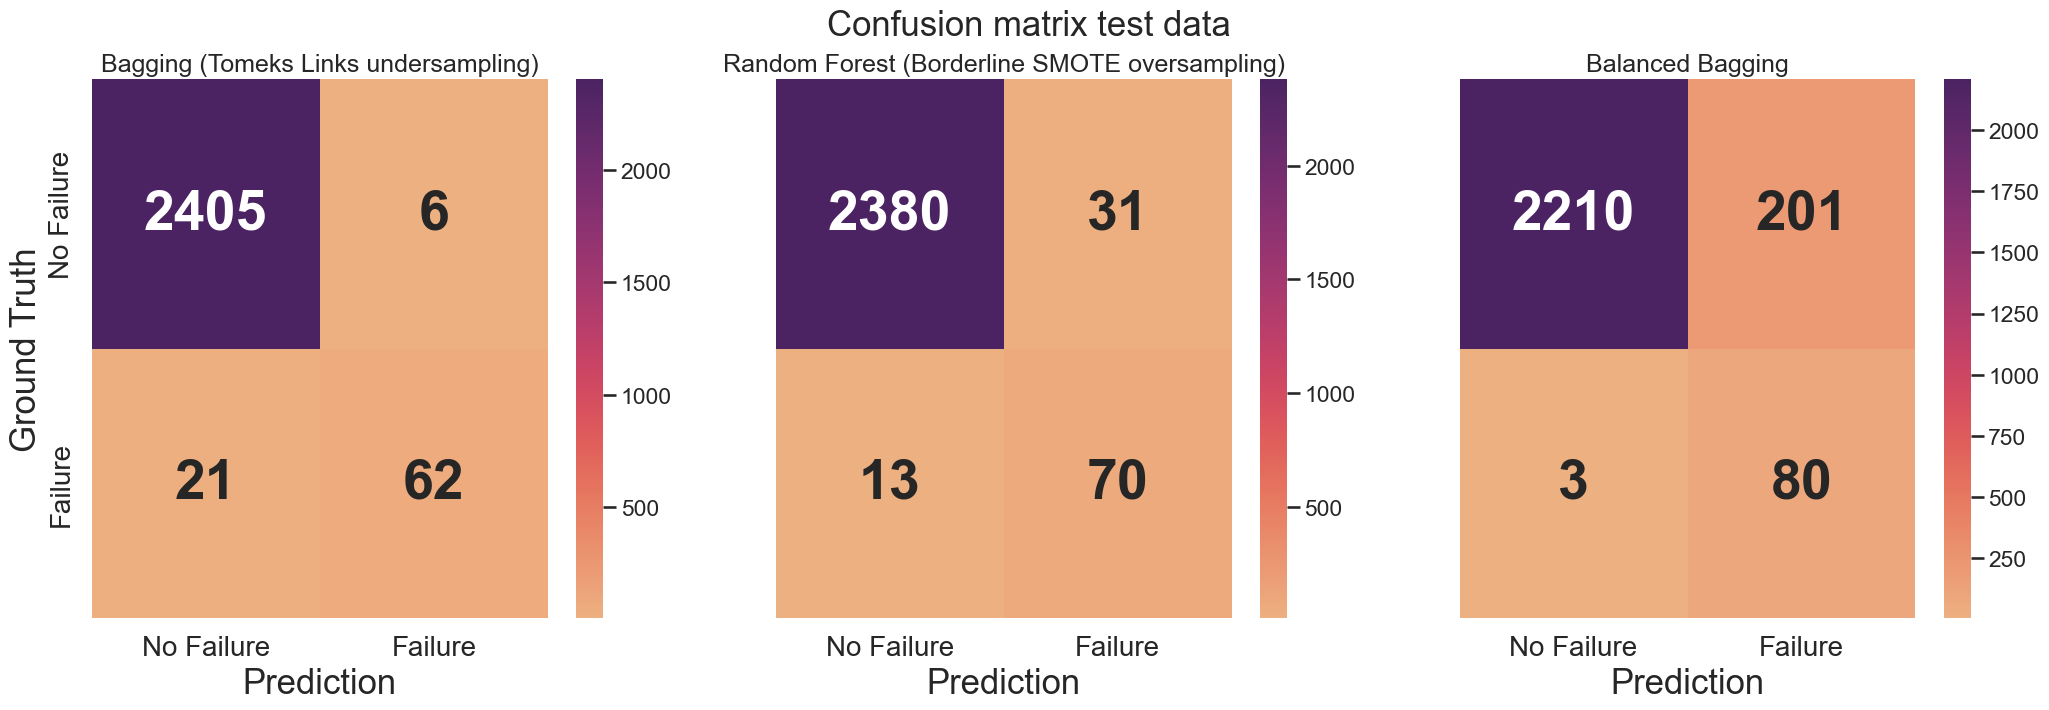

In [41]:
fig, axes = plt.subplots(1, 3, figsize=[25,7])
fig.suptitle('Confusion matrix test data', fontsize=25)
axes.flatten()
j=0

for model in [bag_model, rf_model, bal_bag_model]:
    y_pred = model.predict(X_test)
    # Confusion matrix test data
    sns.set_context('talk')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['No Failure', 'Failure']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction', fontsize=25)
    j += 1

axes[0].set_yticklabels(labels, fontsize=20)
axes[0].set_ylabel('Ground Truth', fontsize=25)
axes[0].set_title('Bagging (Tomeks Links undersampling)')
axes[1].set_title('Random Forest (Borderline SMOTE oversampling)')
axes[2].set_title('Balanced Bagging')
plt.show()

- The current bagging tomek links model does a better job at classifying overall. However, the recall score is low. Consequently, it missed a lot failures (it misclassified 21 failures as no failures).
- The current balanced bagging has a much higher recall; hence it is able to predict almost every failure. However, it has many false positives (it predicted failure 201 times when the machinery was actually working well).

So, what to do next? We can check the roc-auc and precision-recall curves and play around with the decision threshold

#### Roc and precision-recall curves

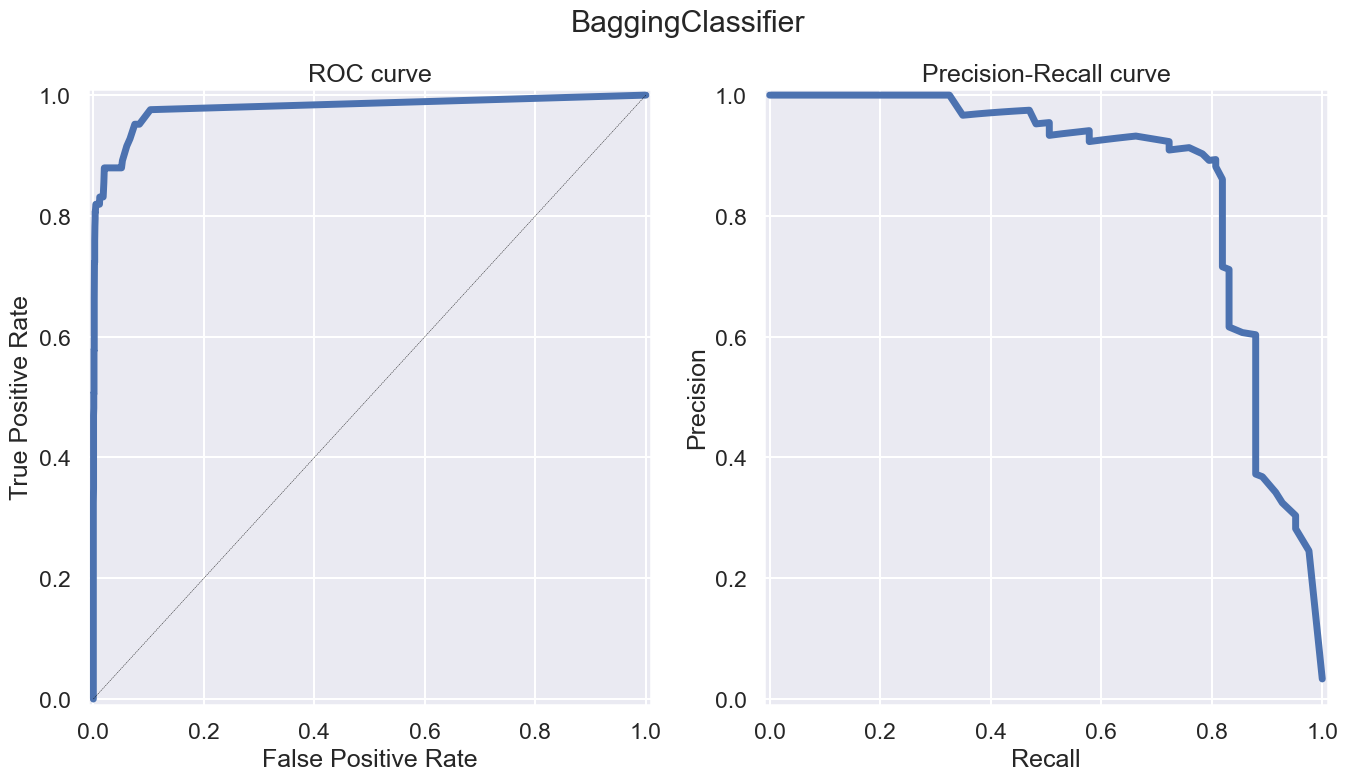

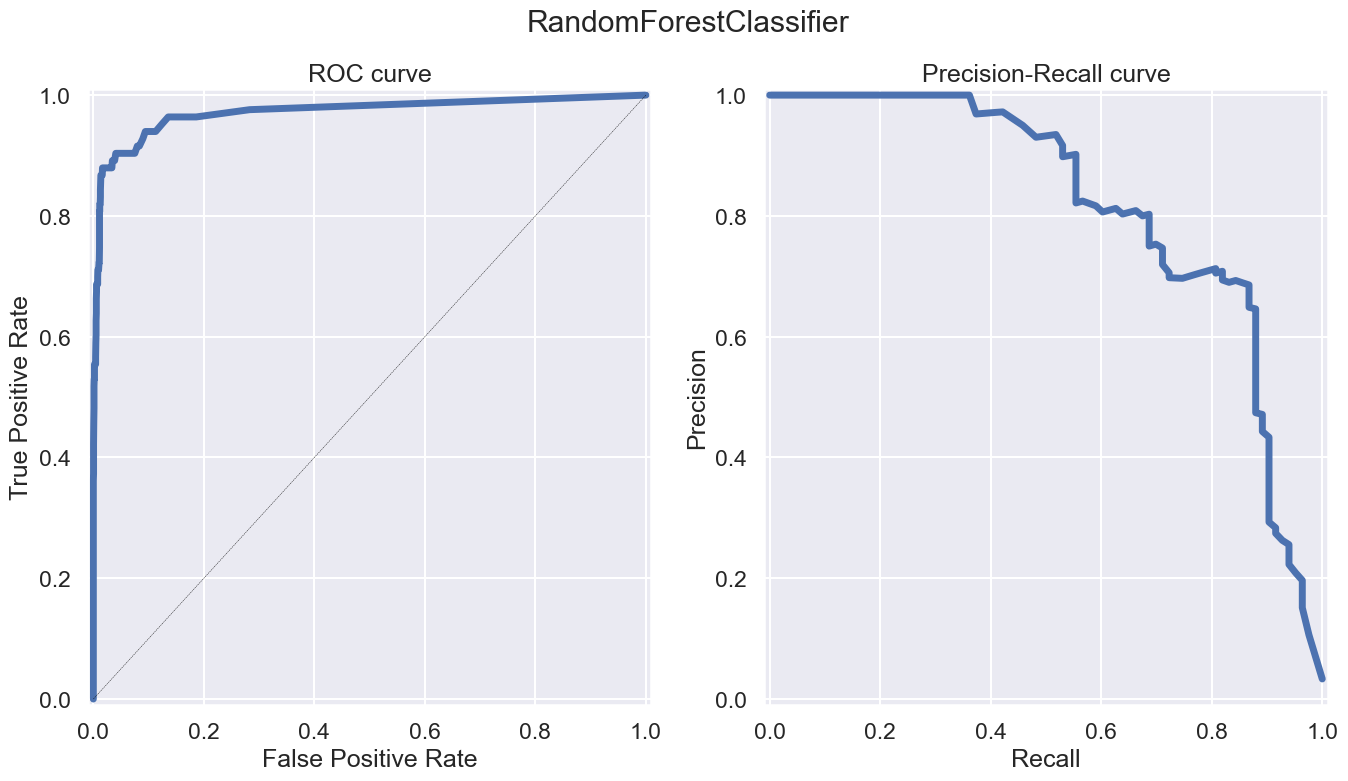

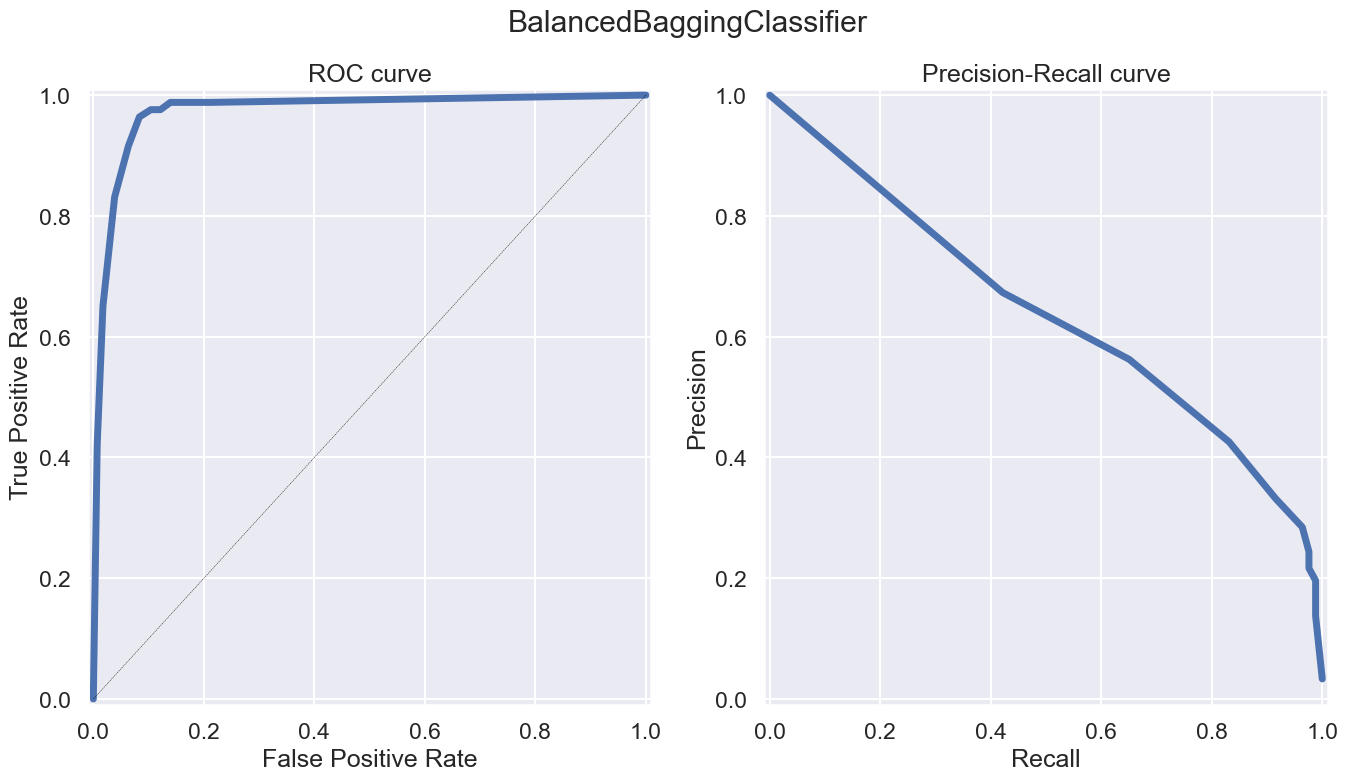

In [42]:
# Roc curve
def roc_prec_recall_curves(model):
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(16, 8)

    y_prob = model.predict_proba(X_test)

    # ROC-AUC curve
    ax = axList[0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    ax.plot(fpr, tpr, linewidth=5)
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)

    # Precision-recall curve
    ax = axList[1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    ax.grid(True)
    plt.suptitle(str(model).split('(')[0])
    
roc_prec_recall_curves(bag_model)
roc_prec_recall_curves(rf_model)
roc_prec_recall_curves(bal_bag_model)
plt.show()

Those plots are using a decision threshold of 0.5 when classiying. As mentioned before, we can play with this number to get a higher recall or precision, considering that there is always a trade-off between them. Let's do that:

#### Precision-Recall wrt decision threshold

First, let's check the classification report of the bagigng tomek links model once again:

In [43]:
# Classification report
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.91      0.75      0.82        83

    accuracy                           0.99      2494
   macro avg       0.95      0.87      0.91      2494
weighted avg       0.99      0.99      0.99      2494



With this model, for the minority class (failure) we obtain a recall of 0.75 and a precision of 0.91. The algorithm classifies using a threshold of 0.5, meaning that if the probability of a certain instance of being class 1 (failure) is 0.51, it will be classied as failure. On the other hand, if it is less than 0.5 it will be classify as not failure.

We can change this threshold to obtain higher recall or precision scores, depending on what we are trying to achieve. For instace, setting a decision threshold at 0.6 would decrease recall and increase precision, and viceversa.

In the curves below, we can see the trade off between recall and precision (for failure class) by changing the decision threshold.

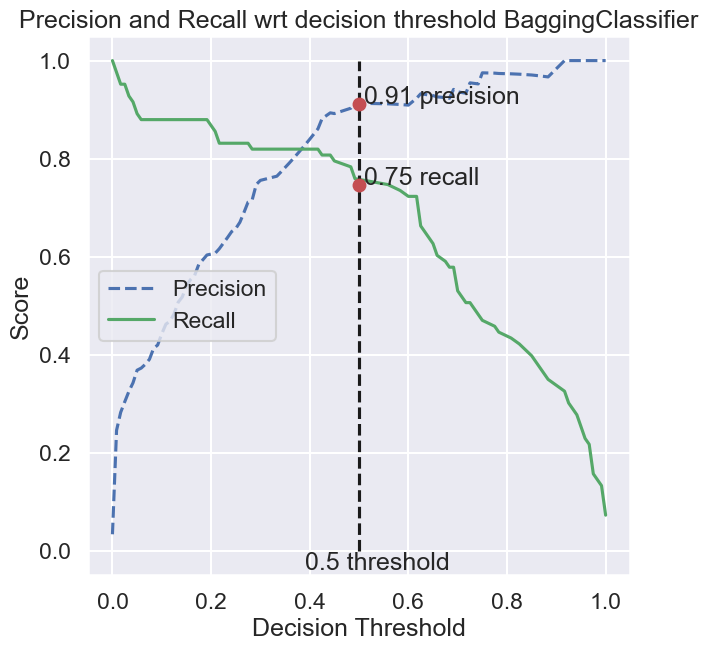

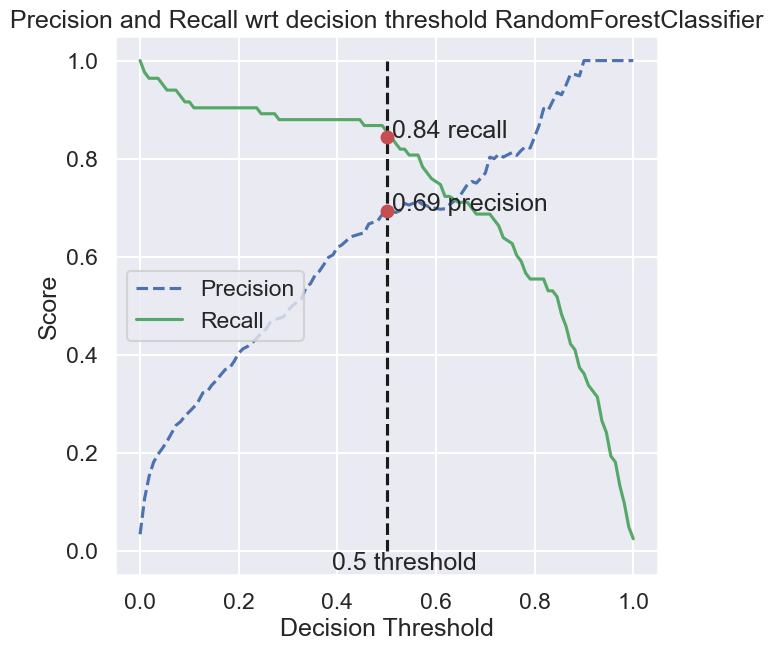

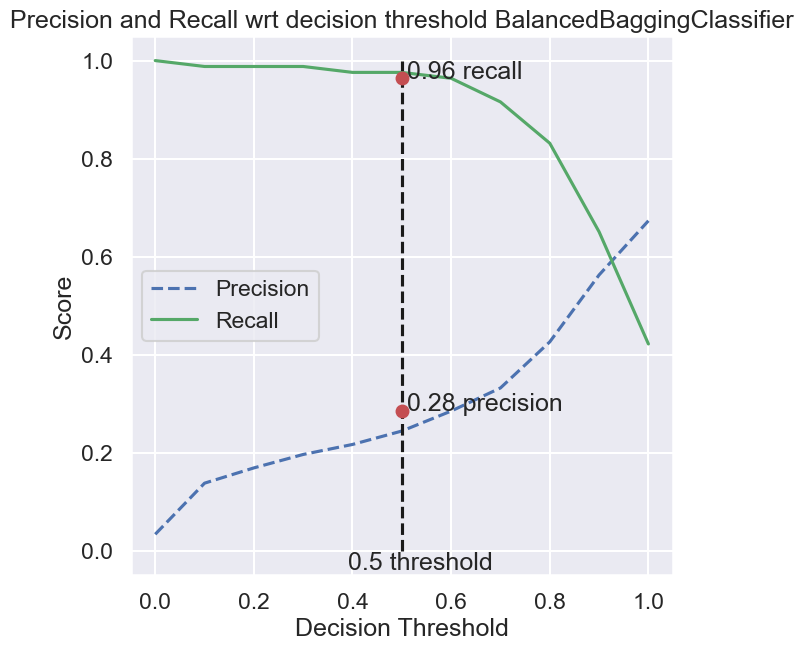

In [44]:
def plot_precision_recall_threshold(model):
    y_pred = model.predict_proba(X_test)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    
    plt.figure(figsize=(7, 7))
    plt.title("Precision and Recall wrt decision threshold " + str(model).split('(')[0])
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot([0.5, 0.5], [0, 1], 'k--')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='center left')
    
    y_pred = model.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred)
    precision = metrics[0][1]
    recall = metrics[1][1]
    
    # Precision score at 0.5 threshold
    plt.plot(0.5, precision, 'or')
    plt.annotate(f'{precision:.2f} precision', (0.51, precision))
    # Recall score at 0.5 threshold
    plt.plot(0.5, recall, 'or')
    plt.annotate(f'{recall:.2f} recall', (0.51, recall))
    plt.annotate('0.5 threshold', (0.39, -0.04))

plot_precision_recall_threshold(bag_model)
plot_precision_recall_threshold(rf_model)
plot_precision_recall_threshold(bal_bag_model)

plt.show()

- In the bagging tomeks links moel, with a default 0.5 threshold, we obtain a 0.75 recall and 0.91 precision score, just as seen in the classification report above.
- In the Balanced Bagging, with a 0.5 decision threshold, we obtain a much higher recall (0.96), but lower precision (0.28).

We can move the decision threshold to achieve the desired trade-off of precision-recall. Since we are trying to predict machine failure, the minority class (class failure) should be more important. Hence, we aim at higher recall at the expense of lower precision. In my opinion, it is better to have some false positives than not predict a failure.

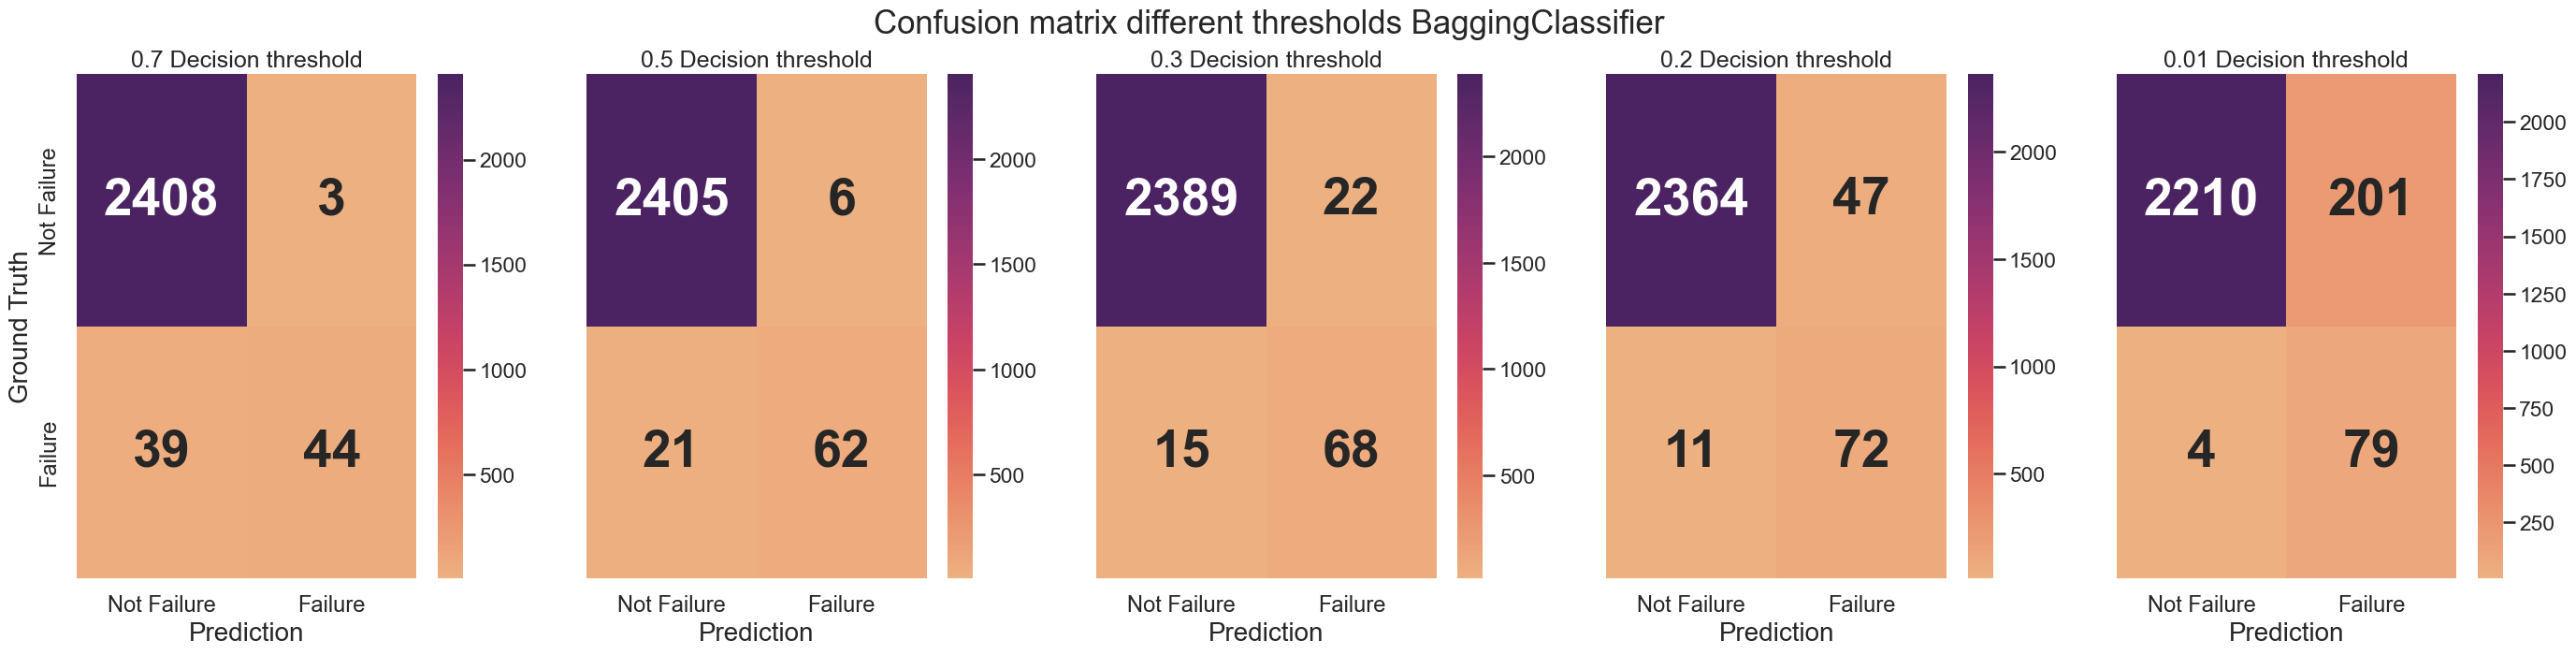

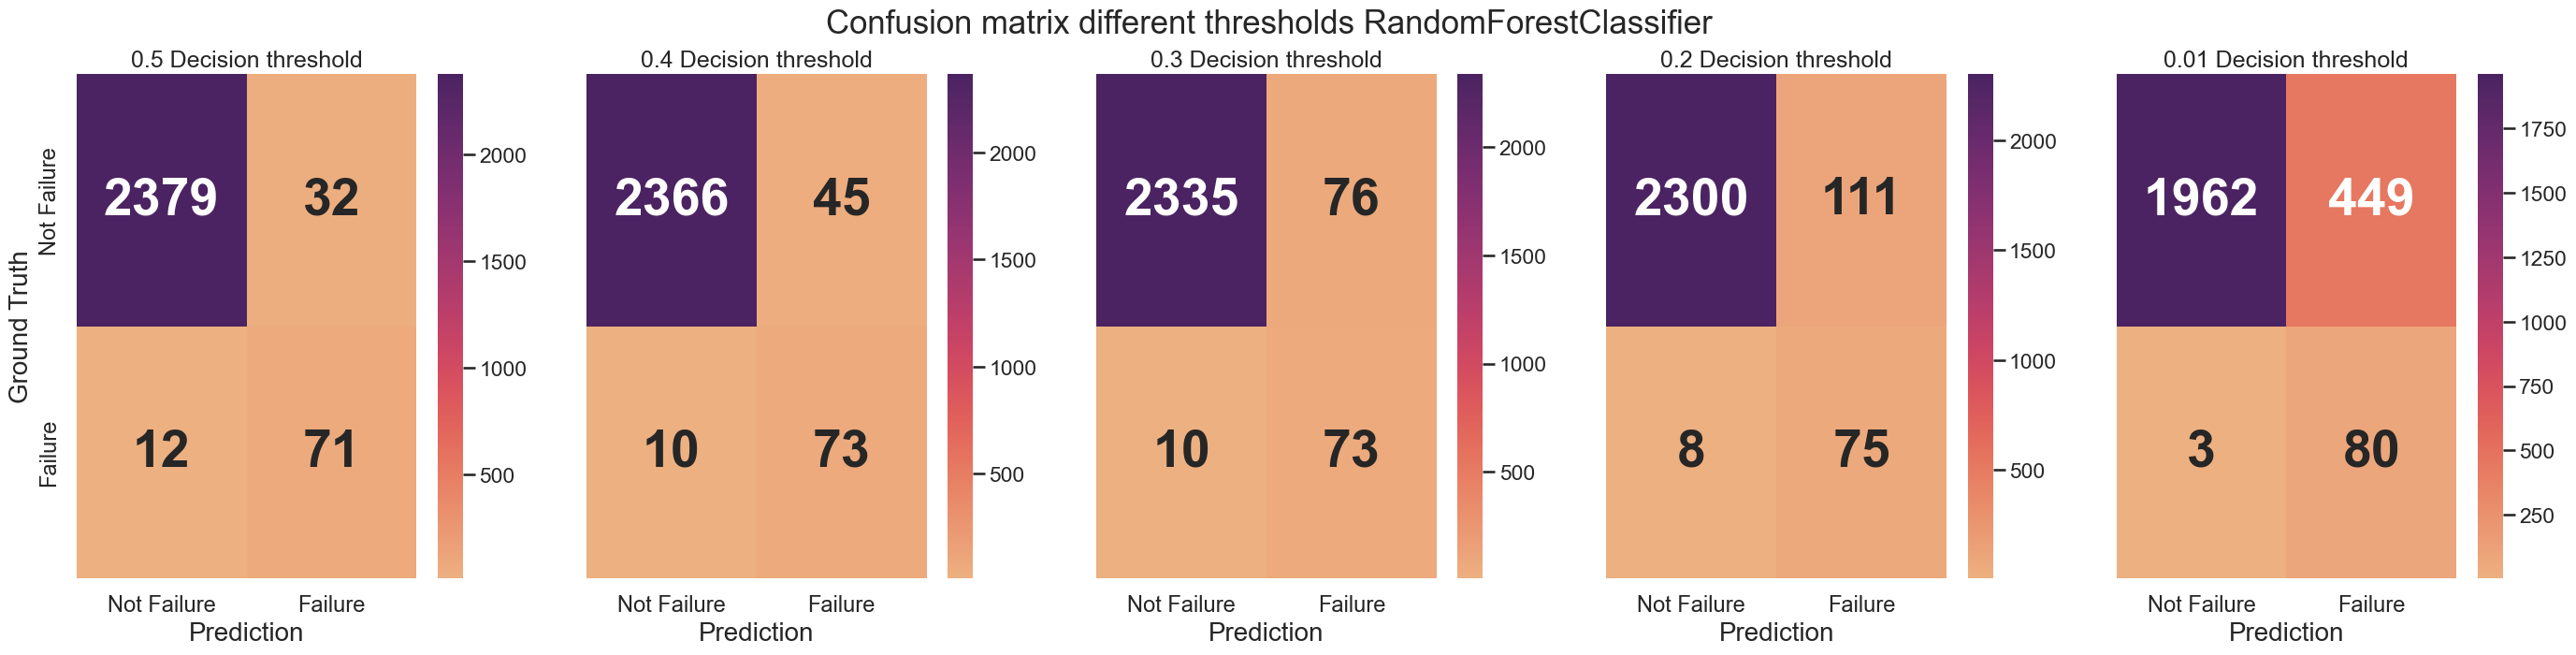

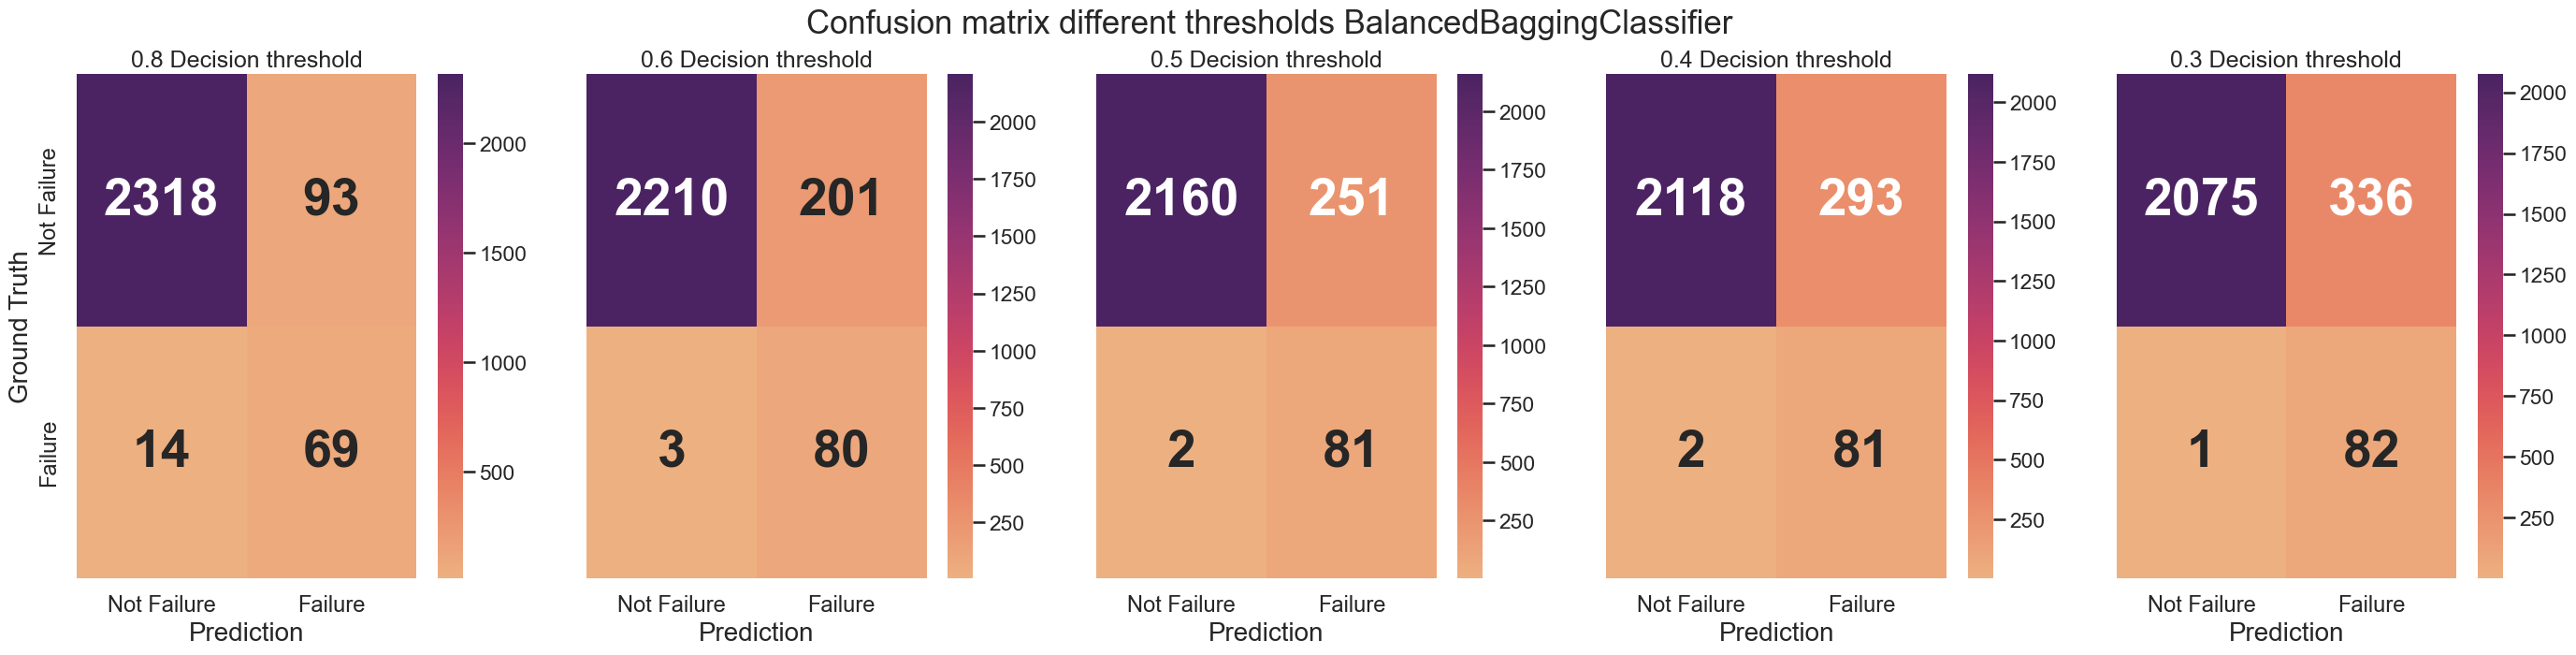

In [45]:
def confusion_matrix_threshold(model, threshold:list):
    # Prediction probabilities with different thresholds
    y_pred_dt = (model.predict_proba(X_test)[:,1] >= threshold[0]).astype(bool).astype(int)
    y_pred_dt_2 = (model.predict_proba(X_test)[:,1] >= threshold[1]).astype(bool).astype(int)
    y_pred_dt_3 = (model.predict_proba(X_test)[:,1] >= threshold[2]).astype(bool).astype(int)
    y_pred_dt_4 = (model.predict_proba(X_test)[:,1] >= threshold[3]).astype(bool).astype(int)
    y_pred_dt_5 = (model.predict_proba(X_test)[:,1] >= threshold[4]).astype(bool).astype(int)
    
    # Confusion matrices with different thresholds
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    cm_dt_2 = confusion_matrix(y_test, y_pred_dt_2)
    cm_dt_3 = confusion_matrix(y_test, y_pred_dt_3)
    cm_dt_4 = confusion_matrix(y_test, y_pred_dt_4)
    cm_dt_5 = confusion_matrix(y_test, y_pred_dt_5)

    # Plotting confusion matrices
    fig, ax = plt.subplots(1,5,figsize=(34,7))
    ax.flatten()
    fig.suptitle('Confusion matrix different thresholds ' + str(model).split('(')[0], fontsize=25)

    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[0])
    sns.heatmap(cm_dt_2, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[1])
    sns.heatmap(cm_dt_3, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[2])
    sns.heatmap(cm_dt_4, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[3])
    sns.heatmap(cm_dt_5, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[4])

    ax[0].set_title(f'{threshold[0]} Decision threshold')
    ax[1].set_title(f'{threshold[1]} Decision threshold')
    ax[2].set_title(f'{threshold[2]} Decision threshold')
    ax[3].set_title(f'{threshold[3]} Decision threshold')
    ax[4].set_title(f'{threshold[4]} Decision threshold')

    labels = ['Not Failure', 'Failure']
    for i in [0,1,2,3,4]:
        ax[i].set_xticklabels(labels, fontsize=17)
        ax[i].set_xlabel('Prediction', fontsize=20)
        ax[i].set_yticklabels(['',''])

    ax[0].set_ylabel('Ground Truth', fontsize=20)
    ax[0].set_yticklabels(labels, fontsize=17)

confusion_matrix_threshold(bag_model, [0.7, 0.5, 0.3, 0.2, 0.01])
confusion_matrix_threshold(rf_model, [0.5, 0.4, 0.3, 0.2, 0.01])
confusion_matrix_threshold(bal_bag_model, [0.8, 0.6, 0.5, 0.4, 0.3])
plt.show()

Let's explain the results...

Decision threshold 0.5:

- Balanced bagging classifier was not able to predict only 2 failures. 251 times classified no failures as failures.
- Bagging Tomek Links was not able to predict 21 failures. But, it misclassified no failures only 6 times.
- Random forest borderline SMOTE was not able to predict 12 failures. It misclassified no failures 32 times.

#### Takeaways:

The bagging tomek links model is not able to reduce the recall on failures lower than 95.18%. Even with a decision threshold of 0.01 (which makes no sense) it still misclassified 4 failures and had 201 false positives. On the other, balanced bagging with a decision threshold of 0.6 is able to have better recall (96.25%) and the same number of false positives (201). Moreover, it is able to reduce the recall down to 98.8% (only 1 misclassified failure) at the expense of increasing the number of positives (336). But, it is the only one of the three models to get this very high recall.

##### Conclusions

In my opinion, the experts from the maintenance and manufacturing departments should be the ones who choose the model in accordance with their objectives.

- If they are looking for the highest failure detection possible, they should go with the balanced bagging model, thou they would be sacrificing precision with lots of false positives.
- If they want a balance between precision and recall, perhaps they could choose between the bagging model 0.4 decision threshold or the random forest model with 0.5 threshold.
- Maybe they do not care much about predicting every failure, but when they do, they want the highest precision possible. In that case, it would be better to opt for the bagging tomek links classifier with a bit higher decision threshold.

So, the selection of the model depends on the application and desired outcomes.

##### Saving models

In [46]:
with open("Bagging_binary.pkl","wb") as files:
    pickle.dump(bag_model,files)
with open("RandomForest_binary.pkl","wb") as files:
    pickle.dump(rf_model,files)
with open("BalancedBagging_binary.pkl","wb") as files:
    pickle.dump(bal_bag_model,files)

In [47]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import Dropdown, VBox, Layout, interactive_output
from IPython.display import display, HTML

# Load the saved models
models = {
    "Bagging": "Bagging_binary.pkl",
    "Random Forest": "RandomForest_binary.pkl",
    "Balanced Bagging": "BalancedBagging_binary.pkl"
}

loaded_models = {}
for name, model_file in models.items():
    with open(model_file, "rb") as file:
        loaded_models[name] = pickle.load(file)

# Example feature columns (replace with your dataset's actual features)
feature_columns = X.columns.tolist()  # Ensure `X` is your feature DataFrame

# Function to plot feature importance
def plot_feature_importance(model_name):
    # Select the model
    model = loaded_models[model_name]

    # Check if the model has the feature_importances_ attribute
    if hasattr(model, "feature_importances_"):
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            "Feature": feature_columns,
            "Importance": feature_importances
        }).sort_values(by="Importance", ascending=False)
        
        # Plot feature importance
        plt.figure(figsize=(8, 6))
        sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
        plt.title(f"Feature Importance for {model_name}", fontsize=16)
        plt.xlabel("Importance", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.show()
    else:
        # If the model doesn't support feature_importances_
        display(HTML(f"<h3 style='color: red;'>The selected model ({model_name}) does not support feature importance!</h3>"))

# Dropdown to select the model
model_dropdown = Dropdown(
    options=list(loaded_models.keys()),
    value="Bagging",
    description="Model:",
    layout=Layout(
        width="300px",
        padding="8px",
        border="1px solid #ddd",
        margin="5px",
        border_radius="8px"
    )
)

# Interactive output
output = interactive_output(plot_feature_importance, {"model_name": model_dropdown})

# Combine dropdown and output
ui = VBox([model_dropdown, output])

# Display the UI
display(ui)


In [48]:
import pickle
import pandas as pd
from ipywidgets import interact, widgets, Layout, VBox, HBox, interactive_output
from IPython.display import display, HTML

# Load the saved models
models = {
    "Bagging": "Bagging_binary.pkl",
    "Random Forest": "RandomForest_binary.pkl",
    "Balanced Bagging": "BalancedBagging_binary.pkl"
}

loaded_models = {}
for name, model_file in models.items():
    with open(model_file, "rb") as file:
        loaded_models[name] = pickle.load(file)

# Example feature columns (replace with your dataset's actual features)
feature_columns = X.columns.tolist()  # Ensure `X` is your feature DataFrame

# Function for prediction using a selected model
def predict_new_data(model_name, **kwargs):
    # Select the model
    model = loaded_models[model_name]
    
    # Create a DataFrame for input features
    input_data = pd.DataFrame([kwargs])
    
    # Predict using the loaded model
    prediction = model.predict(input_data)[0]
    prediction_proba = model.predict_proba(input_data)[0]
    
    # Output result
    result_html = f"""
    <div style="
        border: 2px solid #4CAF50; 
        background-color: rgba(240, 240, 240, 0.8); 
        border-radius: 12px; 
        padding: 15px; 
        box-shadow: 0px 4px 6px rgba(0, 128, 0, 0.2); 
        margin-top: 10px; 
        text-align: center;">
        <h3 style="color: #4CAF50;">Model Selected: {model_name}</h3>
        <p><strong>Prediction:</strong> {prediction} ({'No Failure' if prediction == 0 else 'Failure'})</p>
        <p><strong>Prediction Probabilities:</strong> {prediction_proba}</p>
    </div>
    """
    display(HTML(result_html))

# Create sliders for each feature
sliders = []
for feature in feature_columns:
    slider = widgets.FloatSlider(
        value=X[feature].mean(),
        min=X[feature].min(),
        max=X[feature].max(),
        step=(X[feature].max() - X[feature].min()) / 100,
        description=feature,
        continuous_update=True,
        layout=Layout(
            width="280px",
            border="1px solid #ddd",
            padding="8px",
            margin="5px",
            border_radius="8px",
            box_shadow="0px 4px 6px rgba(0, 0, 0, 0.1)"
        )
    )
    sliders.append(slider)

# Dropdown to select the model
model_dropdown = widgets.Dropdown(
    options=list(loaded_models.keys()),
    value="Bagging",
    description="Model:",
    layout=Layout(
        width="300px",
        padding="8px",
        border="1px solid #ddd",
        margin="5px",
        border_radius="8px"
    )
)

# Organize sliders into three columns
n_columns = 3
columns = [VBox(sliders[i::n_columns], layout=Layout(margin="5px")) for i in range(n_columns)]

# Combine widgets into a stylish layout
ui = VBox([
    HBox([model_dropdown], layout=Layout(justify_content="center", margin="10px")),
    HBox(
        columns,
        layout=Layout(
            justify_content="space-between",
            border="3px solid #4CAF50",
            box_shadow="0px 8px 16px rgba(0, 128, 0, 0.2)",
            padding="15px",
            border_radius="12px",
            background_color="rgba(240, 240, 240, 0.8)"
        )
    )
])

# Interactive function
widget_args = {slider.description: slider for slider in sliders}
widget_args["model_name"] = model_dropdown
output = interactive_output(predict_new_data, widget_args)

# Output frame styling
output_layout = widgets.HTML(
    value="""
    <div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 12px; margin-top: 10px; background-color: rgba(245, 245, 245, 0.9);">
        <h4 style="margin: 5px 0;">Prediction Output</h4>
    </div>
    """
)

# Display the widgets and prediction output
display(ui)
display(output)


Output()

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier, EasyEnsembleClassifier
import metriculous as met  # Import metriculous for evaluation

# Load the dataset
print("Available columns:", dataset.columns)

# Features and target preparation
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = dataset['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)  # Binarize target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Define classifiers
brfc = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1)
RUSB = RUSBoostClassifier(random_state=42)
EEC = EasyEnsembleClassifier(random_state=42)

# Initialize plot
fig, axes = plt.subplots(1, 4, figsize=[35, 7])
fig.suptitle('Confusion Matrix Test Set', fontsize=30)
axes = axes.flatten()

results_df = pd.DataFrame()
j = 0

# Loop through models and evaluate
for model in [brfc, bbc, RUSB, EEC]:
    print('Fitting', model)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Metriculous Evaluation
    evaluator = met.ClassificationEvaluator(
        y_true=y_test,
        y_pred=y_pred,
        y_scores=y_pred_proba,
        target_names=["Setosa", "Non-Setosa"]
    )
    evaluator.visualize()
    
    # Cross-validation
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    cross_val_scores = cross_validate(model, X, y, scoring=["f1_macro", "roc_auc", "precision_macro", "recall_macro"])
    roc_auc_test_cv = round(cross_val_score(model, X, y, cv=cv, scoring="roc_auc").mean(), 4)
    
    # Results DataFrame
    score_df = pd.DataFrame({
        'f1': round(cross_val_scores["test_f1_macro"].mean(), 4),
        'roc_auc': roc_auc_test_cv
    }, index=[str(model).split('(')[0]])
    
    results_df = pd.concat([results_df, score_df])
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])
    axes[j].set_title(str(model).split('(')[0])
    axes[j].set_xticklabels(["No Failure", "Failure"], fontsize=20)
    axes[j].set_yticklabels(["No Failure", "Failure"], fontsize=20)
    axes[j].set_xlabel(f'Prediction \n ROC AUC score = {roc_auc_test_cv}', fontsize=20)
    if j == 0:
        axes[j].set_ylabel('Ground Truth', fontsize=25)
    j += 1

# Show Results
plt.show()

results_df = results_df.sort_values(by='f1', ascending=False)
print("Cross-Validation Results Summary:")
print(results_df.round(4))


ImportError: cannot import name 'DeprecatedAlias' from 'bokeh.core.property.alias' (c:\Users\harry\anaconda3\envs\tf_env\lib\site-packages\bokeh\core\property\alias.py)

In [53]:
pip uninstall bokeh


^C
Note: you may need to restart the kernel to use updated packages.
